In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\bluechip\Downloads\temperature.txt')

In [3]:
print('No of Row:', df.shape[0])
print('No of Coloumns:', df.shape[1])
df.head()

No of Row: 7752
No of Coloumns: 25


station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [7]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], object: ['Date']}

In [8]:
df.duplicated().sum()

0

In [9]:
df.isin([' ','NA','_']).sum().any()

False

In [10]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
LDAPS_CC3                     75        0.967492
LDAPS_PPT4                    75        0.967492
LDAPS_PPT2                    75        0.967492
LDAPS_PPT1                    75        0.967492
LDAPS_CC4                     75        0.967492
LDAPS_CC2                     75        0.967492
LDAPS_CC1                     75        0.967492
LDAPS_LH                      75        0.967492
LDAPS_WS                      75        0.967492
LDAPS_Tmin_lapse              75        0.967492
LDAPS_Tmax_lapse              75        0.967492
LDAPS_RHmax                   75        0.967492
LDAPS_RHmin                   75        0.967492
LDAPS_PPT3                    75        0.967492
Present_Tmin                  70        0.902993
Present_Tmax                  70        0.902993
Next_Tmax                     27        0.348297
Next_Tmin                     27        0.348297
Date                           2        0.025800
station             

In [11]:
print("We had {} Rows and {} Columns before dropping null values.".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns after dropping null values.".format(df.shape[0], df.shape[1]))

We had 7752 Rows and 25 Columns before dropping null values.
We have 7588 Rows and 25 Columns after dropping null values.


In [12]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2   30   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5   30   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9   30   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3   30   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5   30   

   Month  Year  
0      6  2013  
1      6  2013  
2      6  2013  
3      6  2013  
4      6  2013  

[5 rows x 28 columns]

In [14]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat         lon          DEM        Slope  \
count  7588.000000  ...  7588.000000  7588.00000  7588.000000  7588.000000   
mean      0.368510  ...    37.544792   126.99142    61.918136     1.259755   
std       0.262260  ...     0.050428     0.07922    54.323529     1.372748   
min       0.000000  ...    37.456200   126.82600    12.370000     0.098500   
25%       0.146546  ...    37.510200   126.93700    28.700000     0.271300   
50%       0.315706  ...    37.550700   126.99500    45.716000     0.618000   
75%       0.574174  ...    37.577600   127.04200    59.832400     1.767800   
max       0.967277  ...    37.645000   127.13500   212.335000     5.178200   

       Solar radiation    Next_Tmax    Next_Tmin          Day        Month  \
count      7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean       5343.724208    30.241526    22.910820    16.337375     7.068134   
std         429.782561     3.111807     2.482256     8.216880     2.242389   
min        4329.520508    17.400000    11.300000     7.000000     1.000000   
25%        5001.485717    28.200000    21.300000     8.000000     7.000000   
50%        5441.987305    30.400000    23.100000    16.000000     7.000000   
75%        5729.485840    32.600000    24.600000    24.000000     8.000000   
max        5992.895996    38.900000    29.800000    31.000000    12.000000   

              Year  
count  7588.000000  
mean   2014.991697  
std       1.410877  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

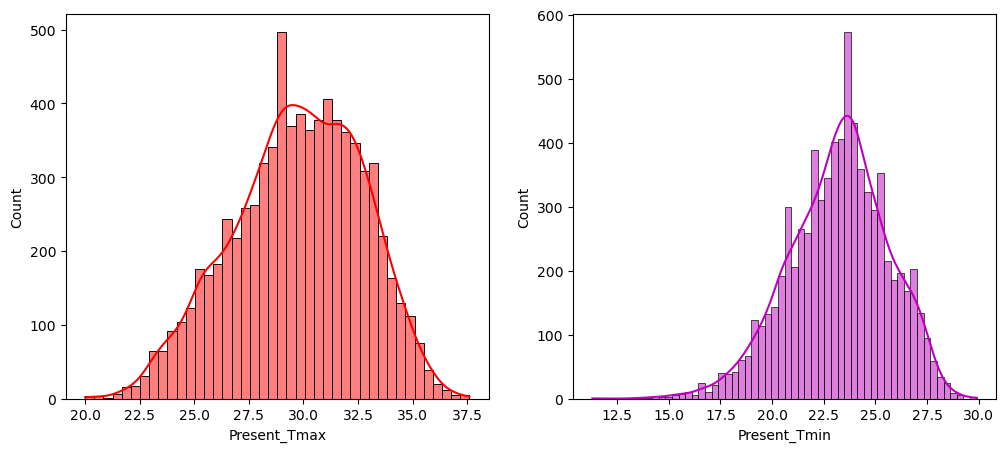

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='m')
plt.show()

In [16]:
print('Present Maximum Temperature Maxima in year 2013-2016 :',df.Present_Tmax.max())
print('Present Maximum Temperature Minima in year 2013-2016 :',df.Present_Tmax.min())
print(' Average Present Maximum Temperature in year 2013-2016 :',df.Present_Tmax.mean())
print('='*100)
print('Present Minimum Temperature Maxima in year 2013-2016 :',df.Present_Tmin.max())
print('Present Minimum Temperature Minima in year 2013-2016 :',df.Present_Tmin.min())
print('Average Present Minimum Temperature in year 2013-2016 :',df.Present_Tmin.mean())

Present Maximum Temperature Maxima in year 2013-2016 : 37.6
Present Maximum Temperature Minima in year 2013-2016 : 20.0
 Average Present Maximum Temperature in year 2013-2016 : 29.748365840801227
Present Minimum Temperature Maxima in year 2013-2016 : 29.9
Present Minimum Temperature Minima in year 2013-2016 : 11.3
Average Present Minimum Temperature in year 2013-2016 : 23.195809172377487


In [17]:
pd.set_option('display.max_columns', None)
df.loc[df.Present_Tmax==df.Present_Tmax.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
5717     18.0 2016-11-08          37.6          26.8    44.254253   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
5717    87.745514         34.794021         27.150764  6.366598  111.225118   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
5717   0.218892   0.094288   0.004283   0.000343         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
5717         0.0         0.0  37.4832  127.024  56.4448  1.2313   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  
5717      5082.563477       37.0       27.8    8     11  2016

In [18]:
df.loc[df.Present_Tmax==df.Present_Tmax.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7725      1.0 2017-08-30          20.0          15.1    35.652172   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
7725     89.97319         24.323737         16.128899  7.087329  108.981108   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
7725   0.046182   0.014955        0.0    0.00063         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
7725         0.0         0.0  37.6046  126.991  212.335  2.785   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  
7725       4614.76123       23.8       15.1   30      8  2017

In [19]:
df.loc[df.Present_Tmin==df.Present_Tmin.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
2397     23.0 2014-02-08          35.3          29.9    53.946949   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
2397    85.985161         30.912804         25.439537  13.011129  117.837212   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
2397   0.684685   0.448827   0.762858   0.635728    1.670126    0.005681   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
2397    0.248885    0.003176  37.5372  126.891  15.5876  0.1554   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  
2397      5360.226563       31.3       24.8    8      2  2014

In [20]:
df.loc[df.Present_Tmin==df.Present_Tmin.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
6116     17.0 2016-08-27          27.1          11.3    62.793823   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
6116    91.726936         23.529546         17.963487  7.984566  84.48145   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
6116   0.668264   0.410536   0.452879   0.627238    0.181458         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
6116    0.405181    1.015573  37.6181  127.099  53.4712  0.697   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  
6116      4539.616699       24.6       17.1   27      8  2016

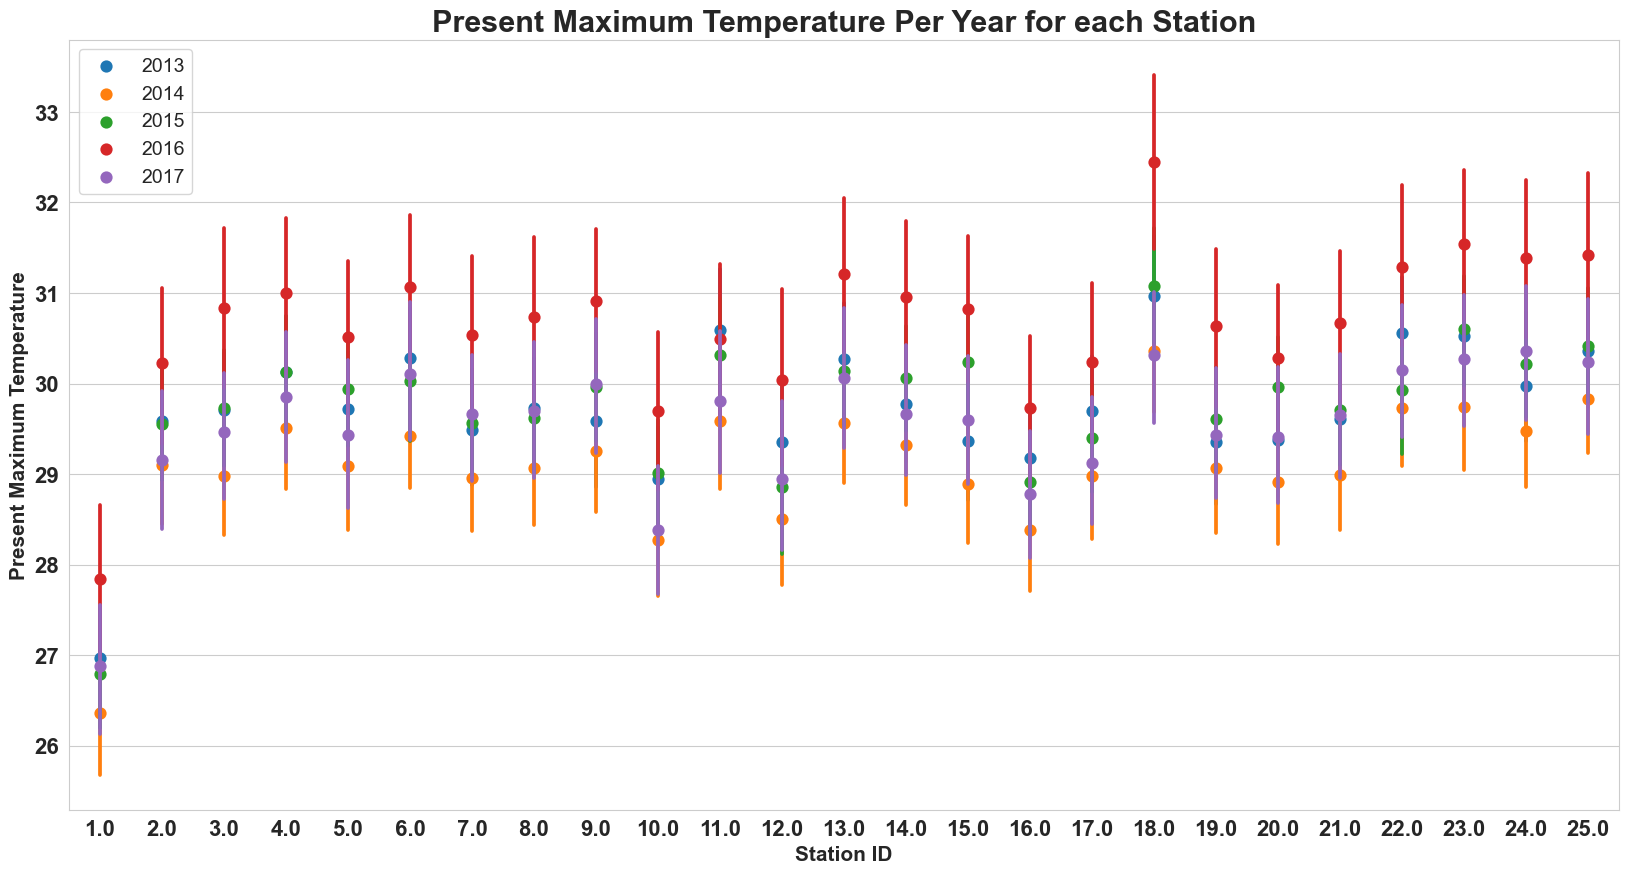

In [21]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmax', data=df, hue='Year',join=False)
plt.title('Present Maximum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

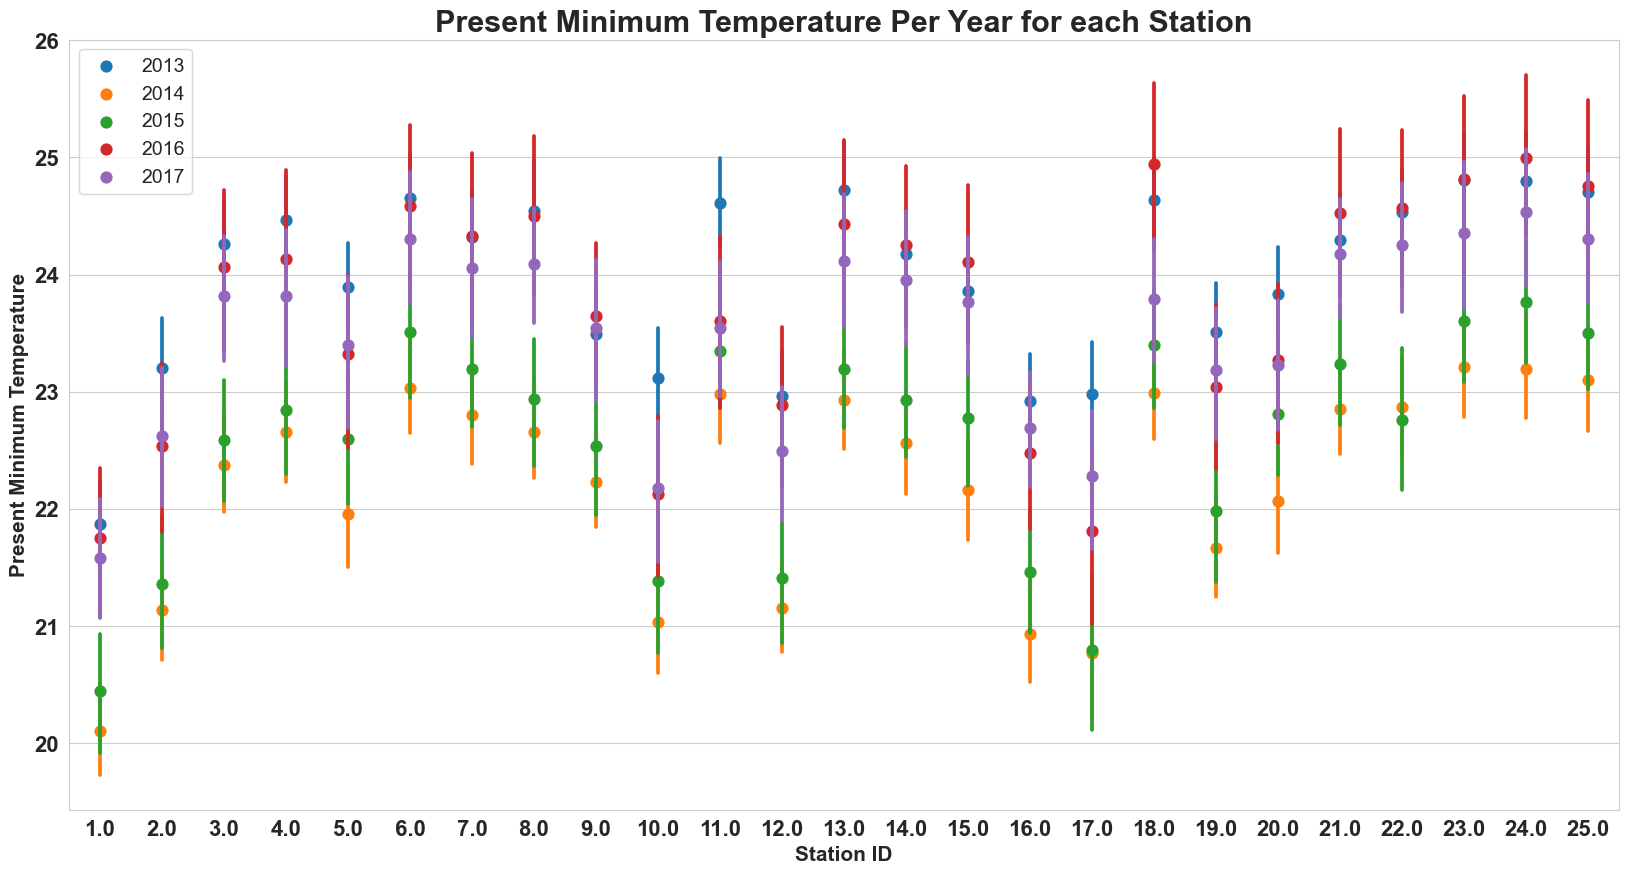

In [22]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmin', data=df, hue='Year',join=False)
plt.title('Present Minimum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Minimum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

<AxesSubplot:xlabel='Month', ylabel='Solar radiation'>

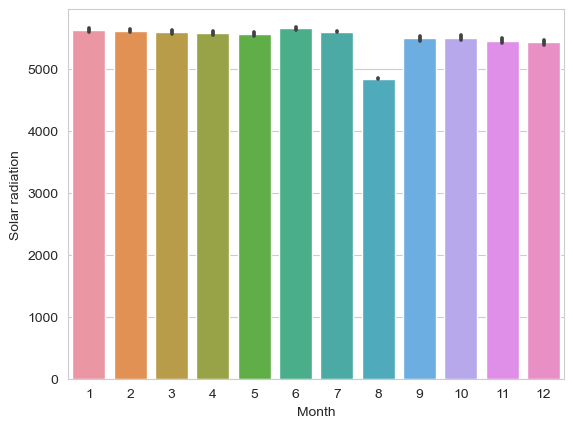

In [23]:
sns.barplot(x=df['Month'], y=df['Solar radiation'])

<AxesSubplot:xlabel='Next_Tmax', ylabel='Solar radiation'>

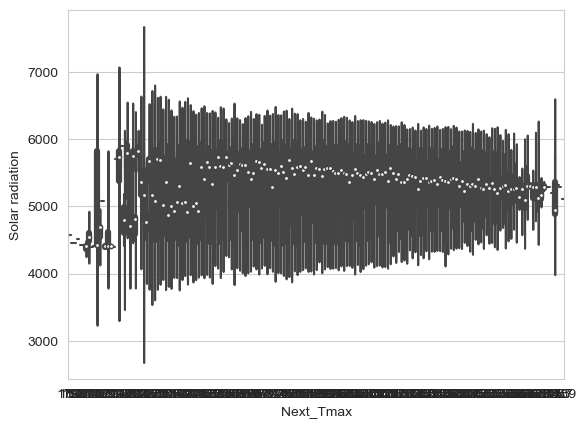

In [24]:
sns.violinplot(x=df['Next_Tmax'], y=df['Solar radiation'])

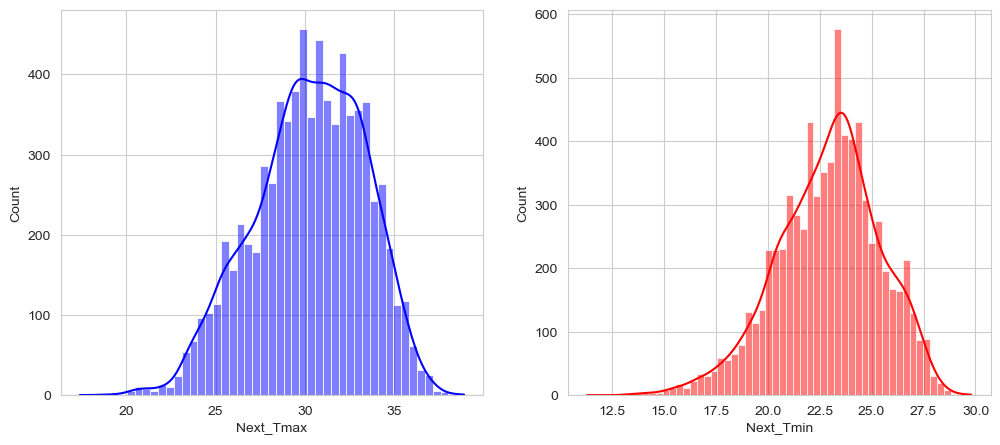

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde=True,color='r')
plt.show()

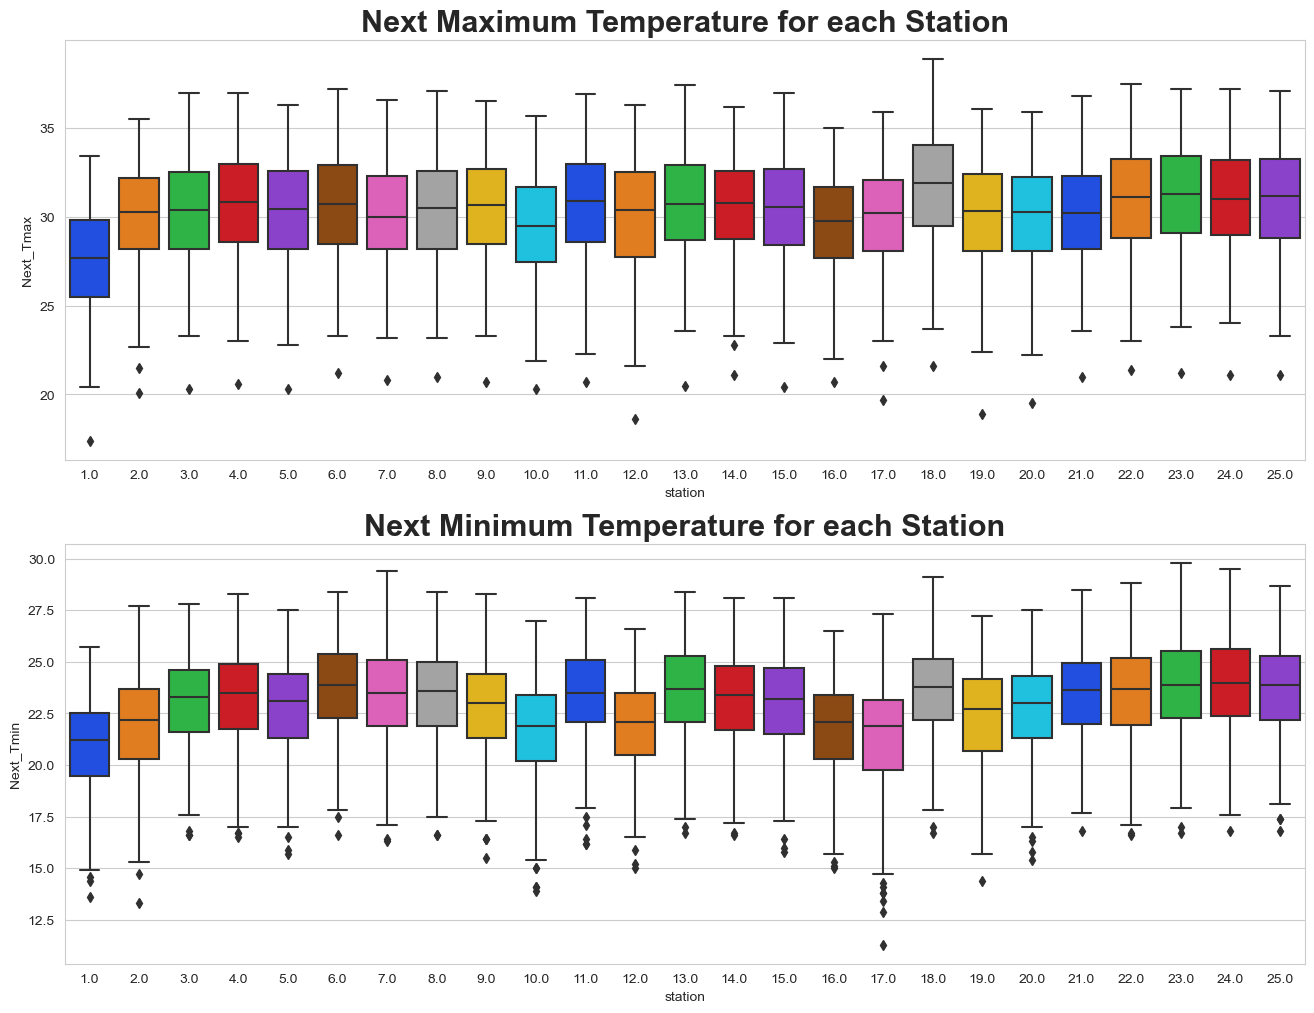

In [26]:
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.boxplot(df['station'],df['Next_Tmax'],data=df,palette="bright")
plt.title('Next Maximum Temperature for each Station', fontsize=22, fontweight='bold')
plt.subplot(2,1,2)
sns.boxplot(df['station'],df['Next_Tmin'],data=df,palette="bright")
plt.title('Next Minimum Temperature for each Station', fontsize=22, fontweight='bold')
plt.show()


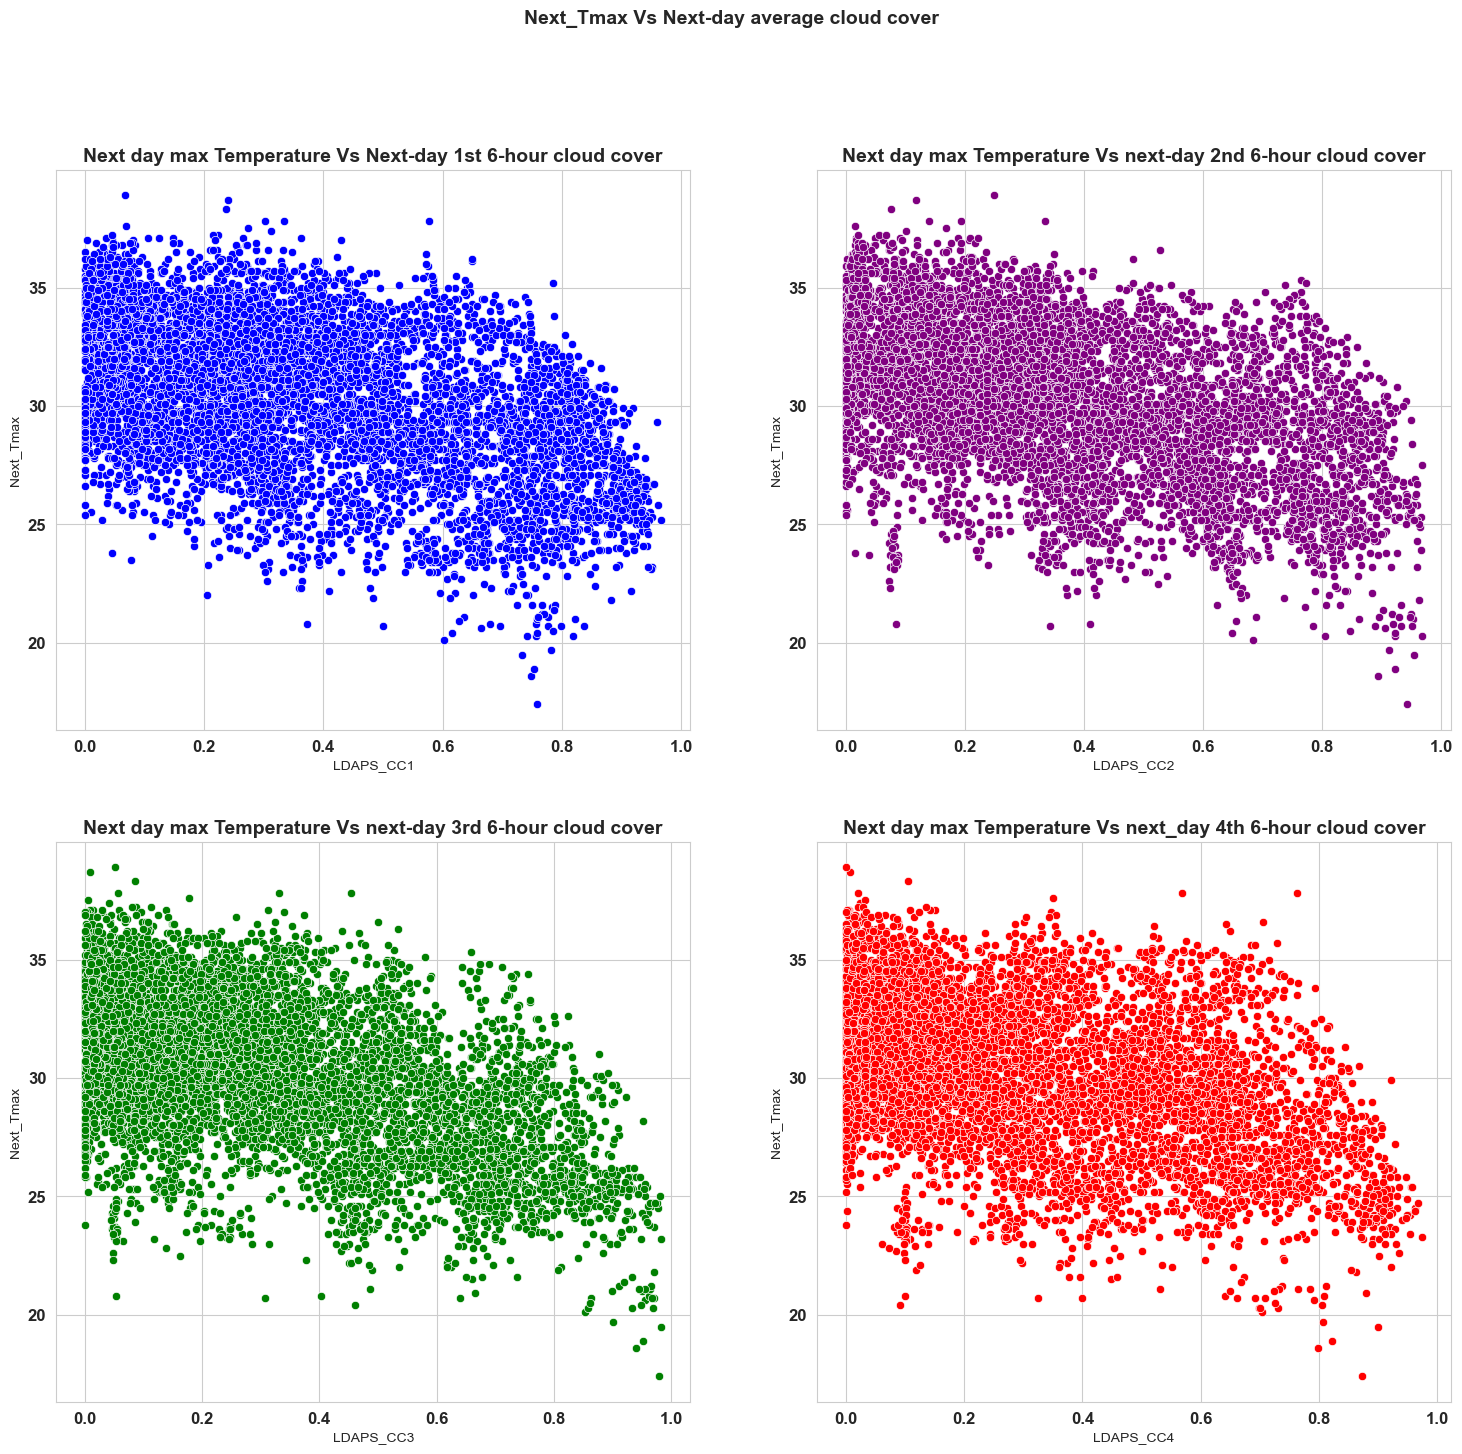

In [27]:
plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover',fontsize=14, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=df,color='purple')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=df,color='green')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=df,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()


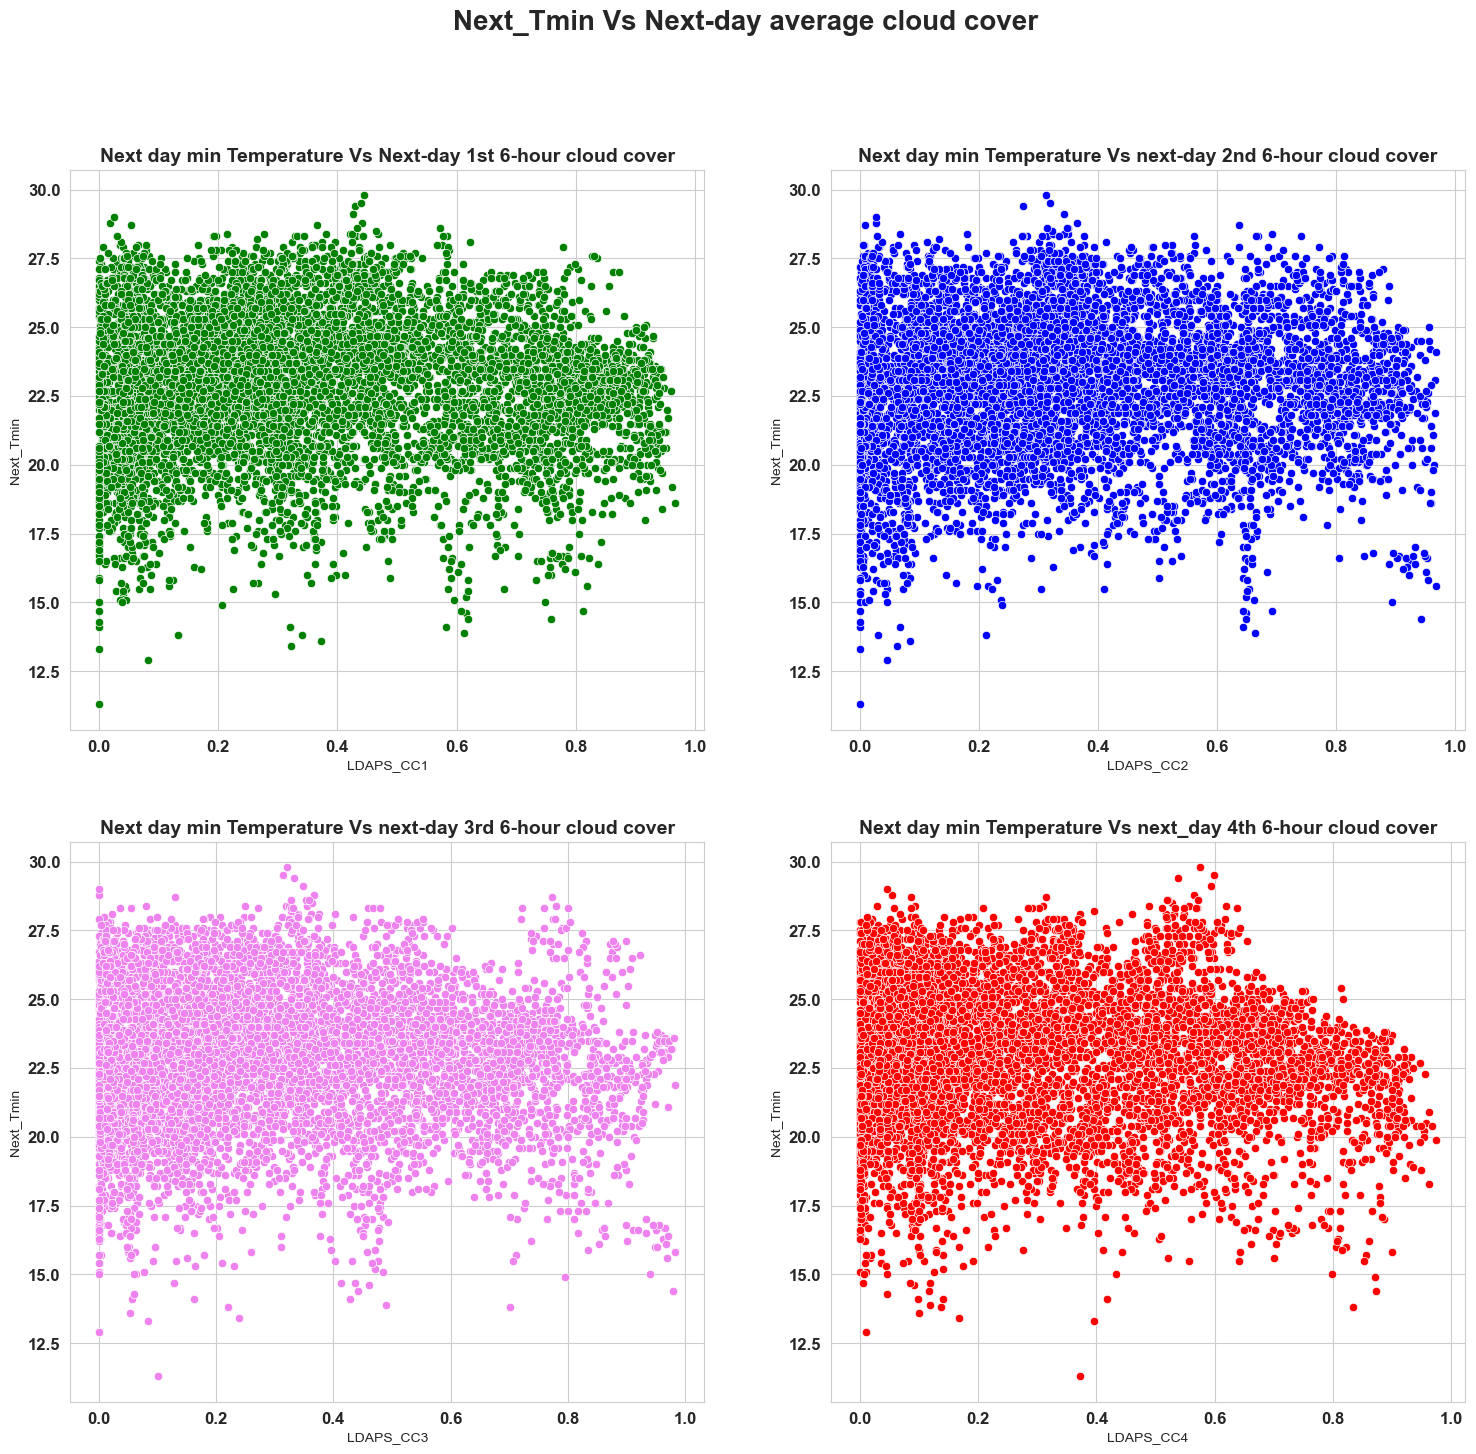

In [28]:
plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmin Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

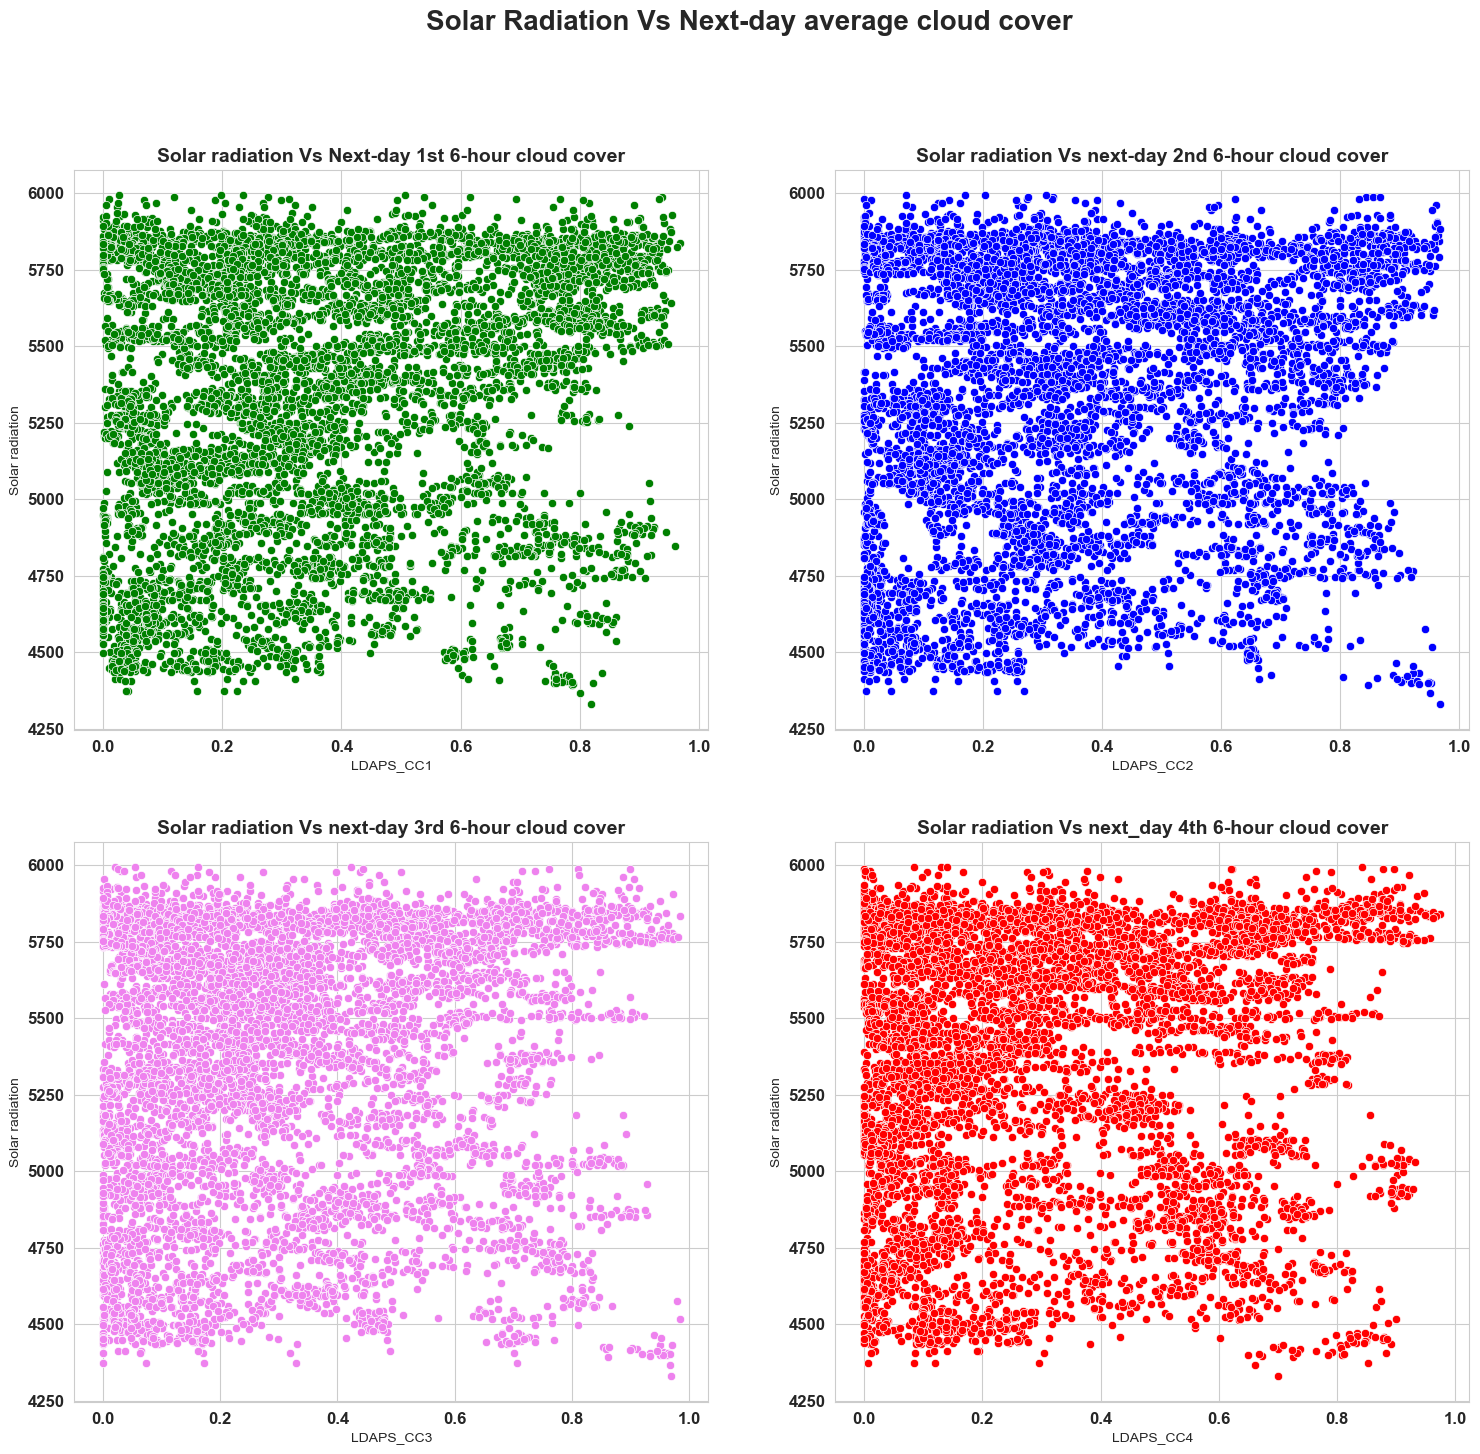

In [29]:
plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

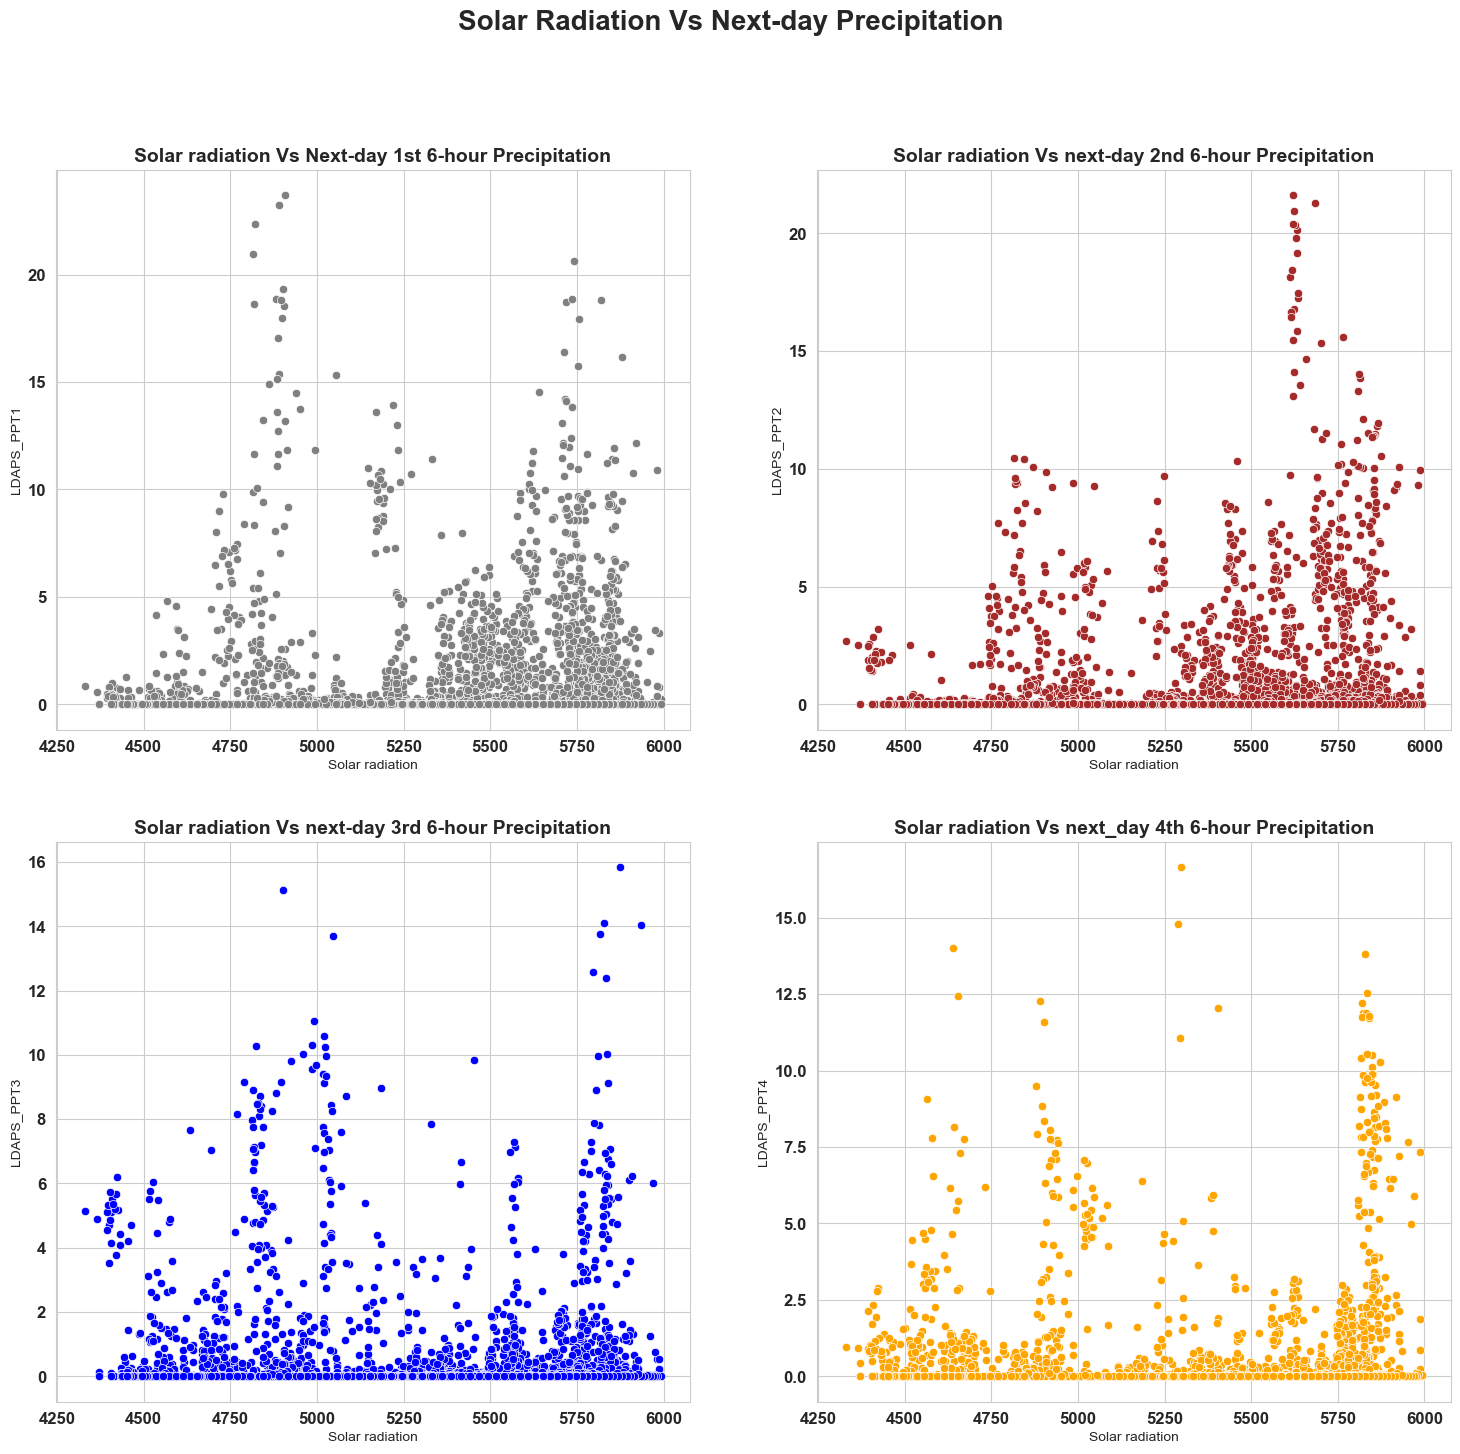

In [30]:
plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day Precipitation',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT1',x='Solar radiation',data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT2',x='Solar radiation',data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT3',x='Solar radiation',data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT4',x='Solar radiation',data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

<AxesSubplot:xlabel='Month', ylabel='LDAPS_PPT1'>

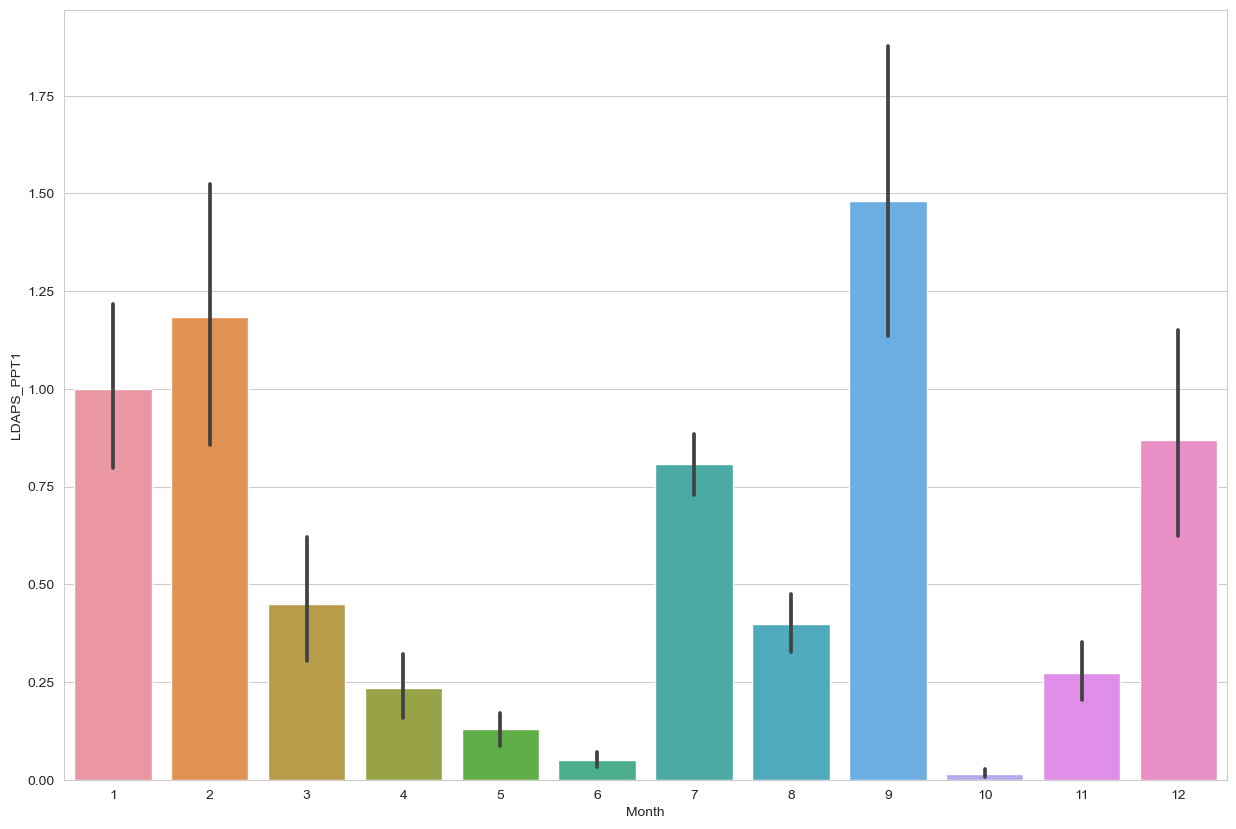

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Month'], y=df['LDAPS_PPT1'])

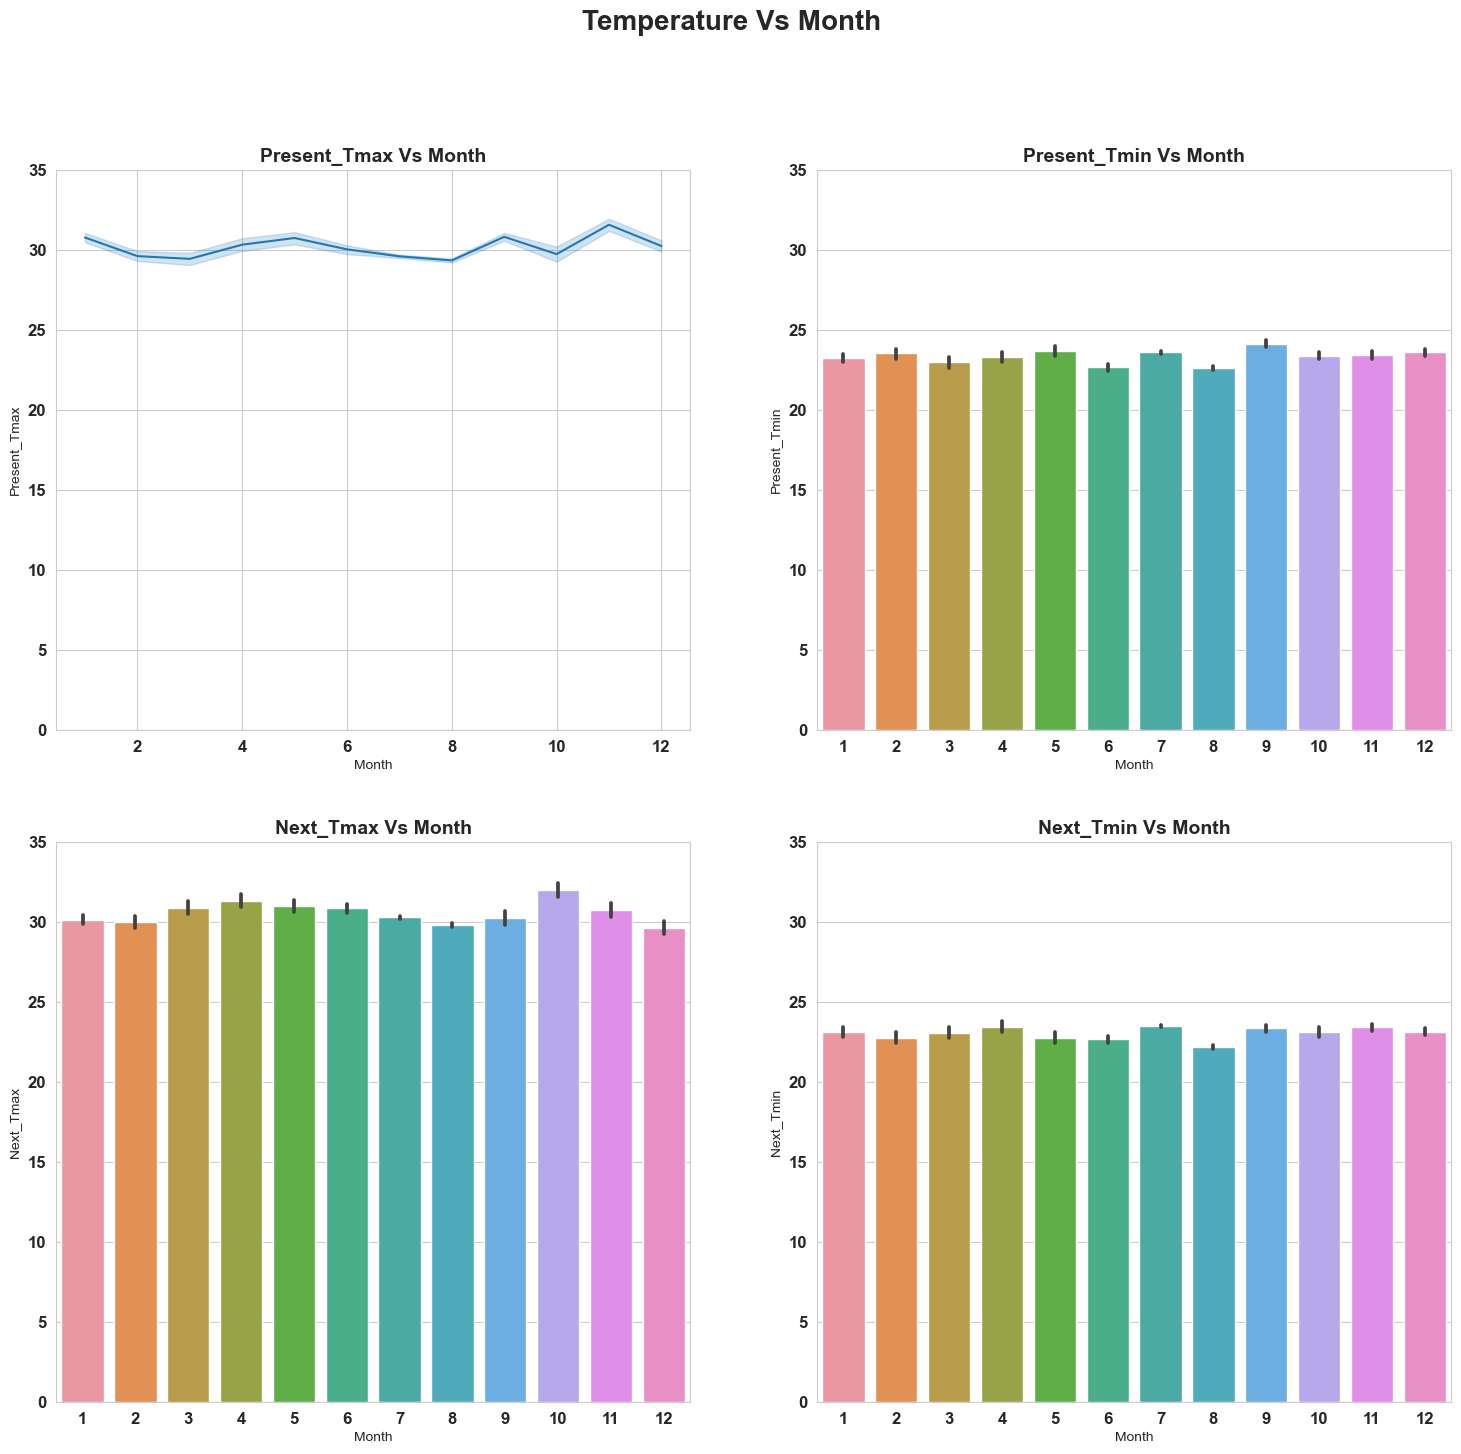

In [32]:
plt.figure(figsize=(18,16))
plt.suptitle('Temperature Vs Month',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Present_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.lineplot(y='Present_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Present_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Present_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

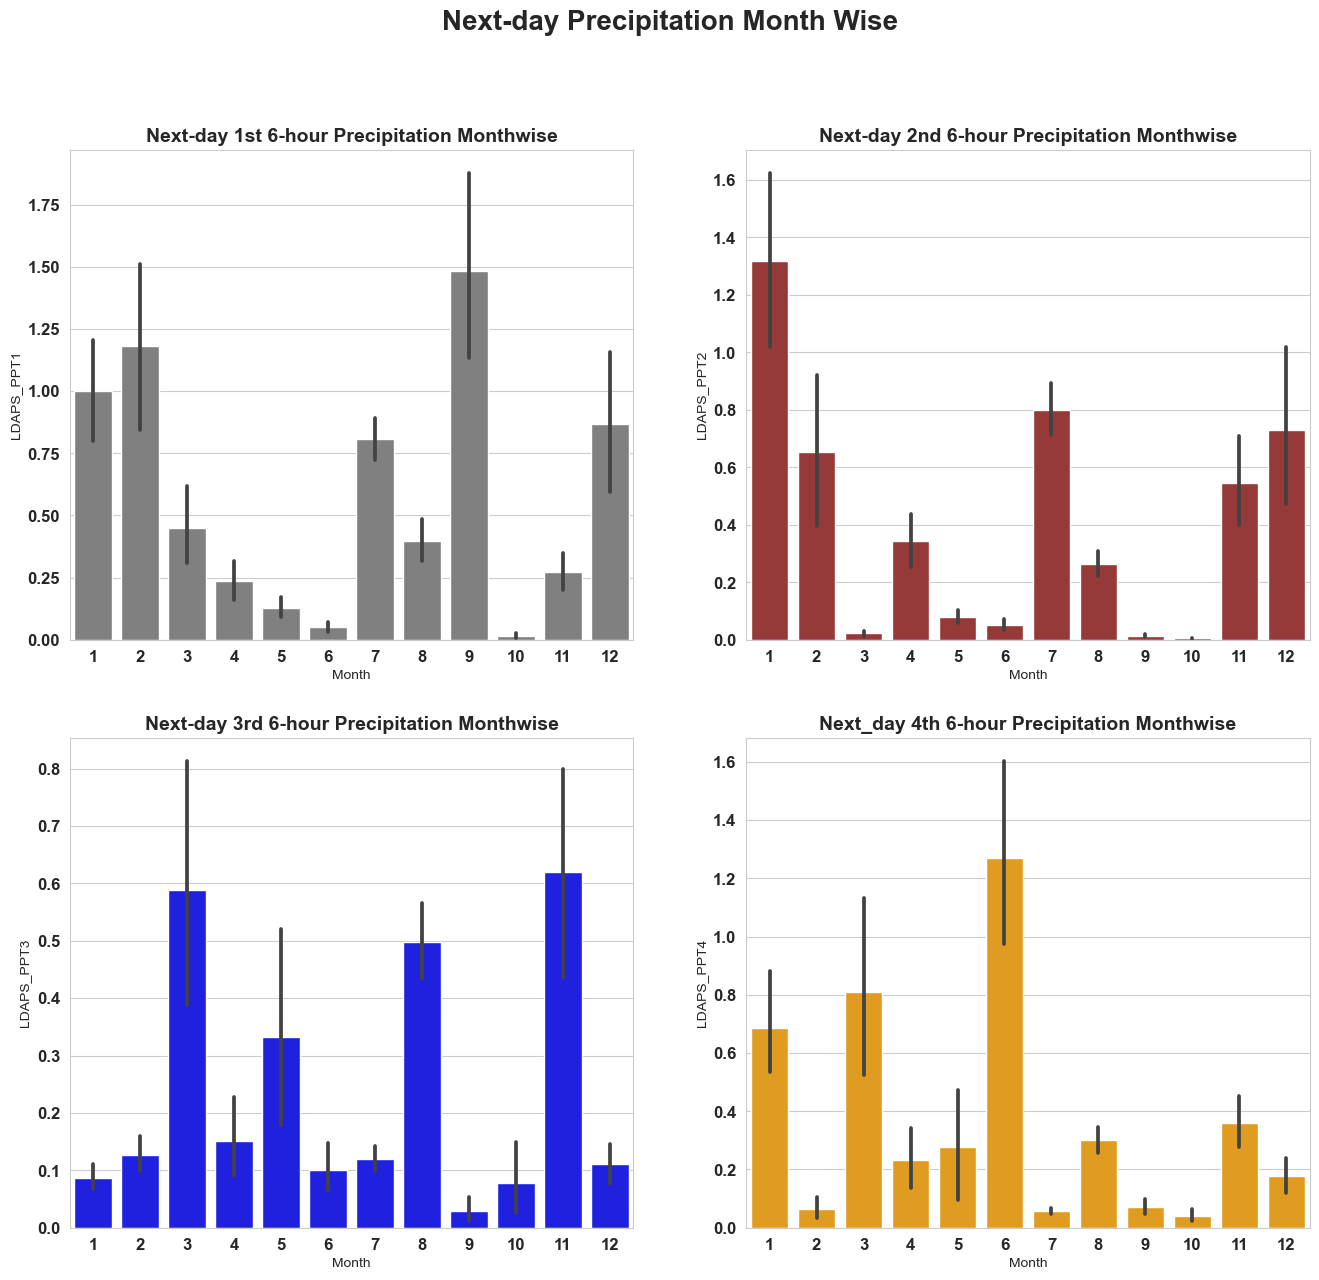

In [33]:
plt.figure(figsize=(16,14))
plt.suptitle('Next-day Precipitation Month Wise',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next-day 1st 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT1'],data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next-day 2nd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT2'],data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next-day 3rd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT3'],data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_day 4th 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT4'],data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

Minimum Solar radiation : 4329.520508
Maximum Solar radiation : 5992.895996
Average Solar radiation : 5343.72420785672


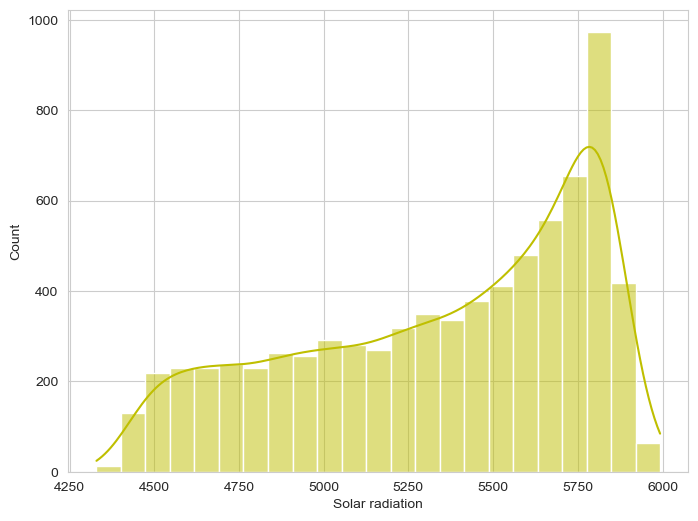

In [34]:
plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'],kde=True,color='y')
print('Minimum Solar radiation :',df['Solar radiation'].min())
print('Maximum Solar radiation :',df['Solar radiation'].max())
print('Average Solar radiation :',df['Solar radiation'].mean())

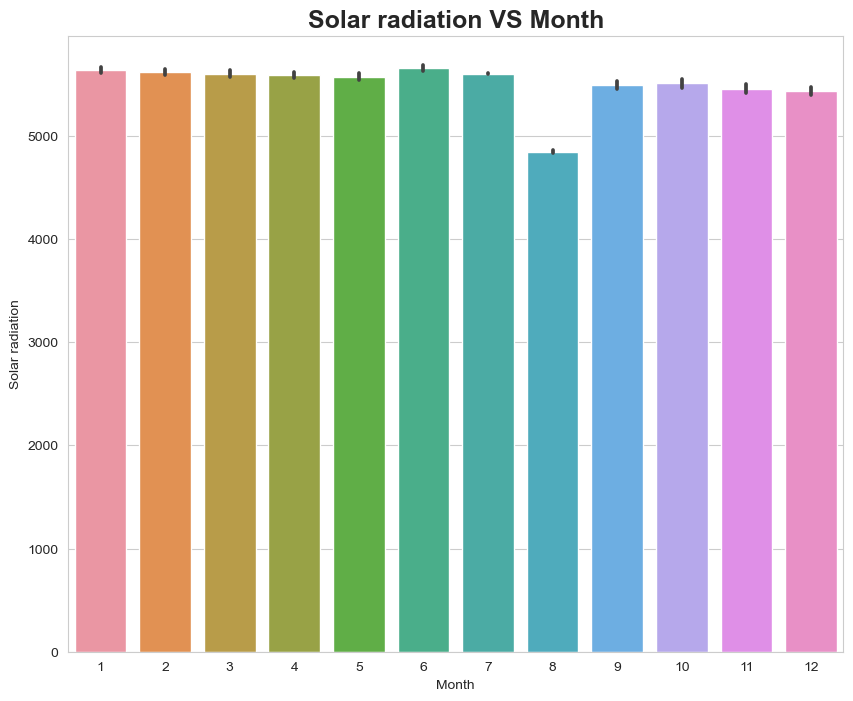

In [35]:
sns.set_palette('husl')
plt.figure(figsize=(10,8))
sns.barplot(y=df['Solar radiation'], x=df['Month'])
plt.title('Solar radiation VS Month',fontsize=18, fontweight='bold')
plt.show()

Minimum Wind Speed : 2.882579625 m/s
Maximum Wind Speed : 21.85762099 m/s
Average Wind Speed : 7.094096699159837 m/s


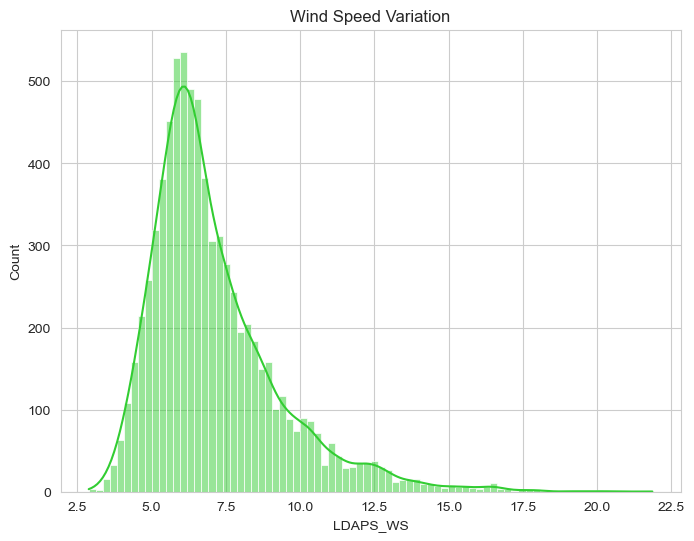

In [36]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True,color='limegreen')
plt.title('Wind Speed Variation')
print('Minimum Wind Speed :',df['LDAPS_WS'].min(),'m/s')
print('Maximum Wind Speed :',df['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :',df['LDAPS_WS'].mean(),'m/s')

Minimum RHmax is 58.93628311 % and Maximum RHmax is 100.0001526 %
Minimum RHmin is 19.79466629 % and Maximum RHmin is 98.5247345 %


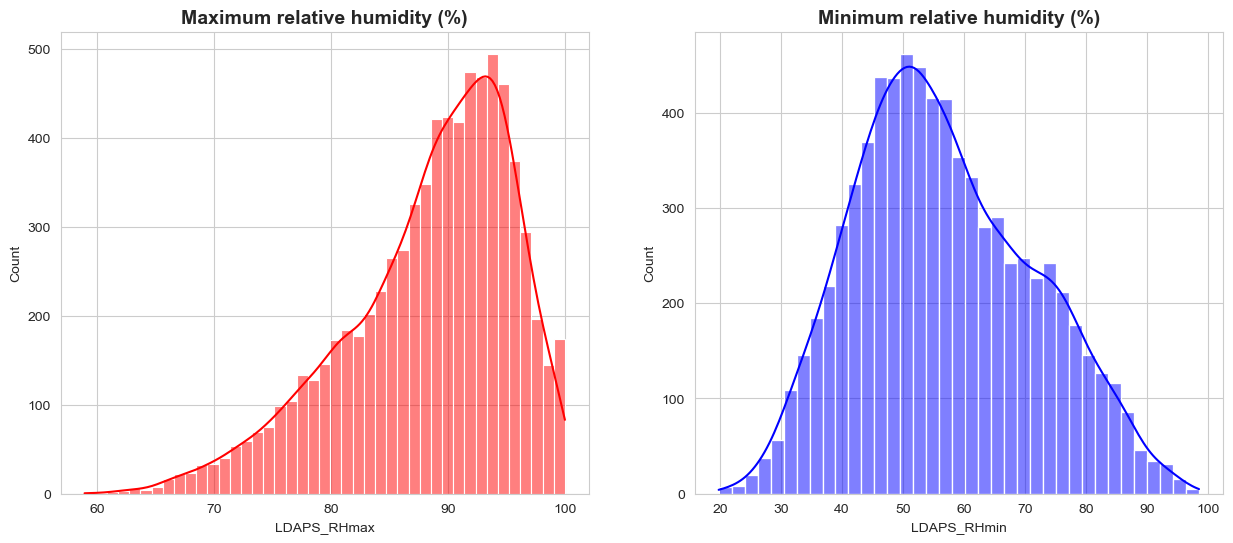

In [37]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='r')
plt.title('Maximum relative humidity (%)',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='b')
plt.title('Minimum relative humidity (%)',fontsize=14, fontweight='bold')
print('Minimum RHmax is {} % and Maximum RHmax is {} %'.format(df['LDAPS_RHmax'].min(),df['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} % and Maximum RHmin is {} %'.format(df['LDAPS_RHmin'].min(),df['LDAPS_RHmin'].max()))

Minimum Tmax applied lapse rate is 17.62495378 (Â°C) and Maximum Tmax applied lapse rate is 38.54225522 (Â°C)
Minimum Tmin is applied lapse rate 14.27264631 (Â°C) and Maximum Tmin applied lapse rate is 29.61934244 (Â°C)


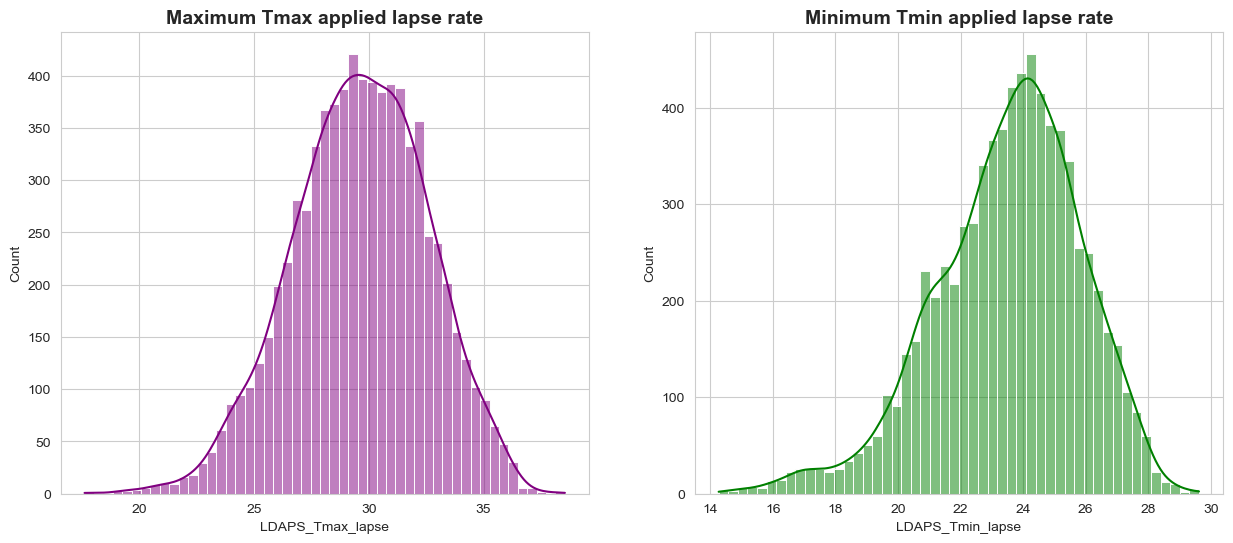

In [38]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color='purple')
plt.title('Maximum Tmax applied lapse rate',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,color='green')
plt.title('Minimum Tmin applied lapse rate',fontsize=14, fontweight='bold')
print('Minimum Tmax applied lapse rate is {} (Â°C) and Maximum Tmax applied lapse rate is {} (Â°C)'.format(df['LDAPS_Tmax_lapse'].min(),df['LDAPS_Tmax_lapse'].max()))
print('Minimum Tmin is applied lapse rate {} (Â°C) and Maximum Tmin applied lapse rate is {} (Â°C)'.format(df['LDAPS_Tmin_lapse'].min(),df['LDAPS_Tmin_lapse'].max()))

Minimum Latent Heat Flux : -13.60321209
Maximum Latent Heat Flux : 213.4140062
Average Latent Heat Flux : 62.492606287988046


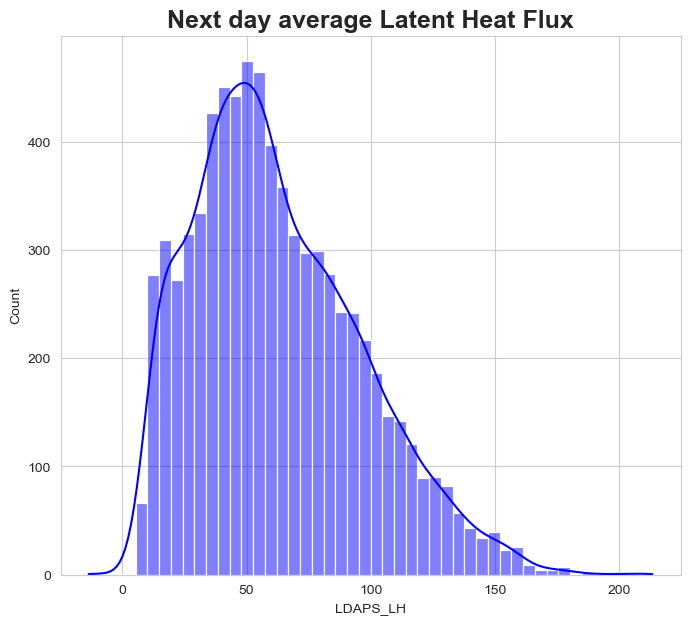

In [39]:
plt.figure(figsize=(8,7))
sns.histplot(df['LDAPS_LH'],kde=True,color='blue')
plt.title('Next day average Latent Heat Flux',fontsize=18, fontweight='bold')
print('Minimum Latent Heat Flux :',df['LDAPS_LH'].min())
print('Maximum Latent Heat Flux :',df['LDAPS_LH'].max())
print('Average Latent Heat Flux :',df['LDAPS_LH'].mean())

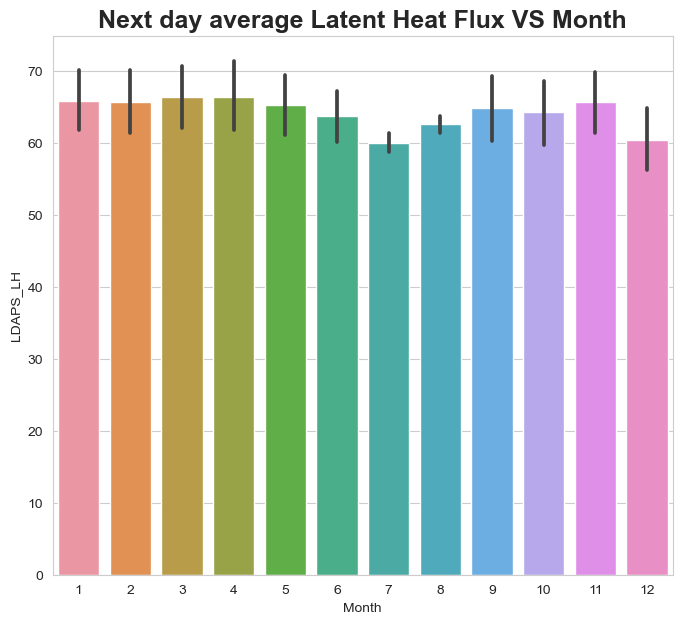

In [40]:
plt.figure(figsize=(8,7))
sns.barplot(y=df['LDAPS_LH'], x=df['Month'])
plt.title('Next day average Latent Heat Flux VS Month',fontsize=18, fontweight='bold')
plt.show()

In [41]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], datetime64[ns]: ['Date'], int64: ['Day', 'Month', 'Year']}

In [43]:
df.drop(['Date'], axis=1, inplace=True)


In [44]:
df.shape

(7588, 27)

In [45]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013  
2       23.9   30      6  2013  
3       24.3   30      6  2013  
4       22.5   30      6  2013

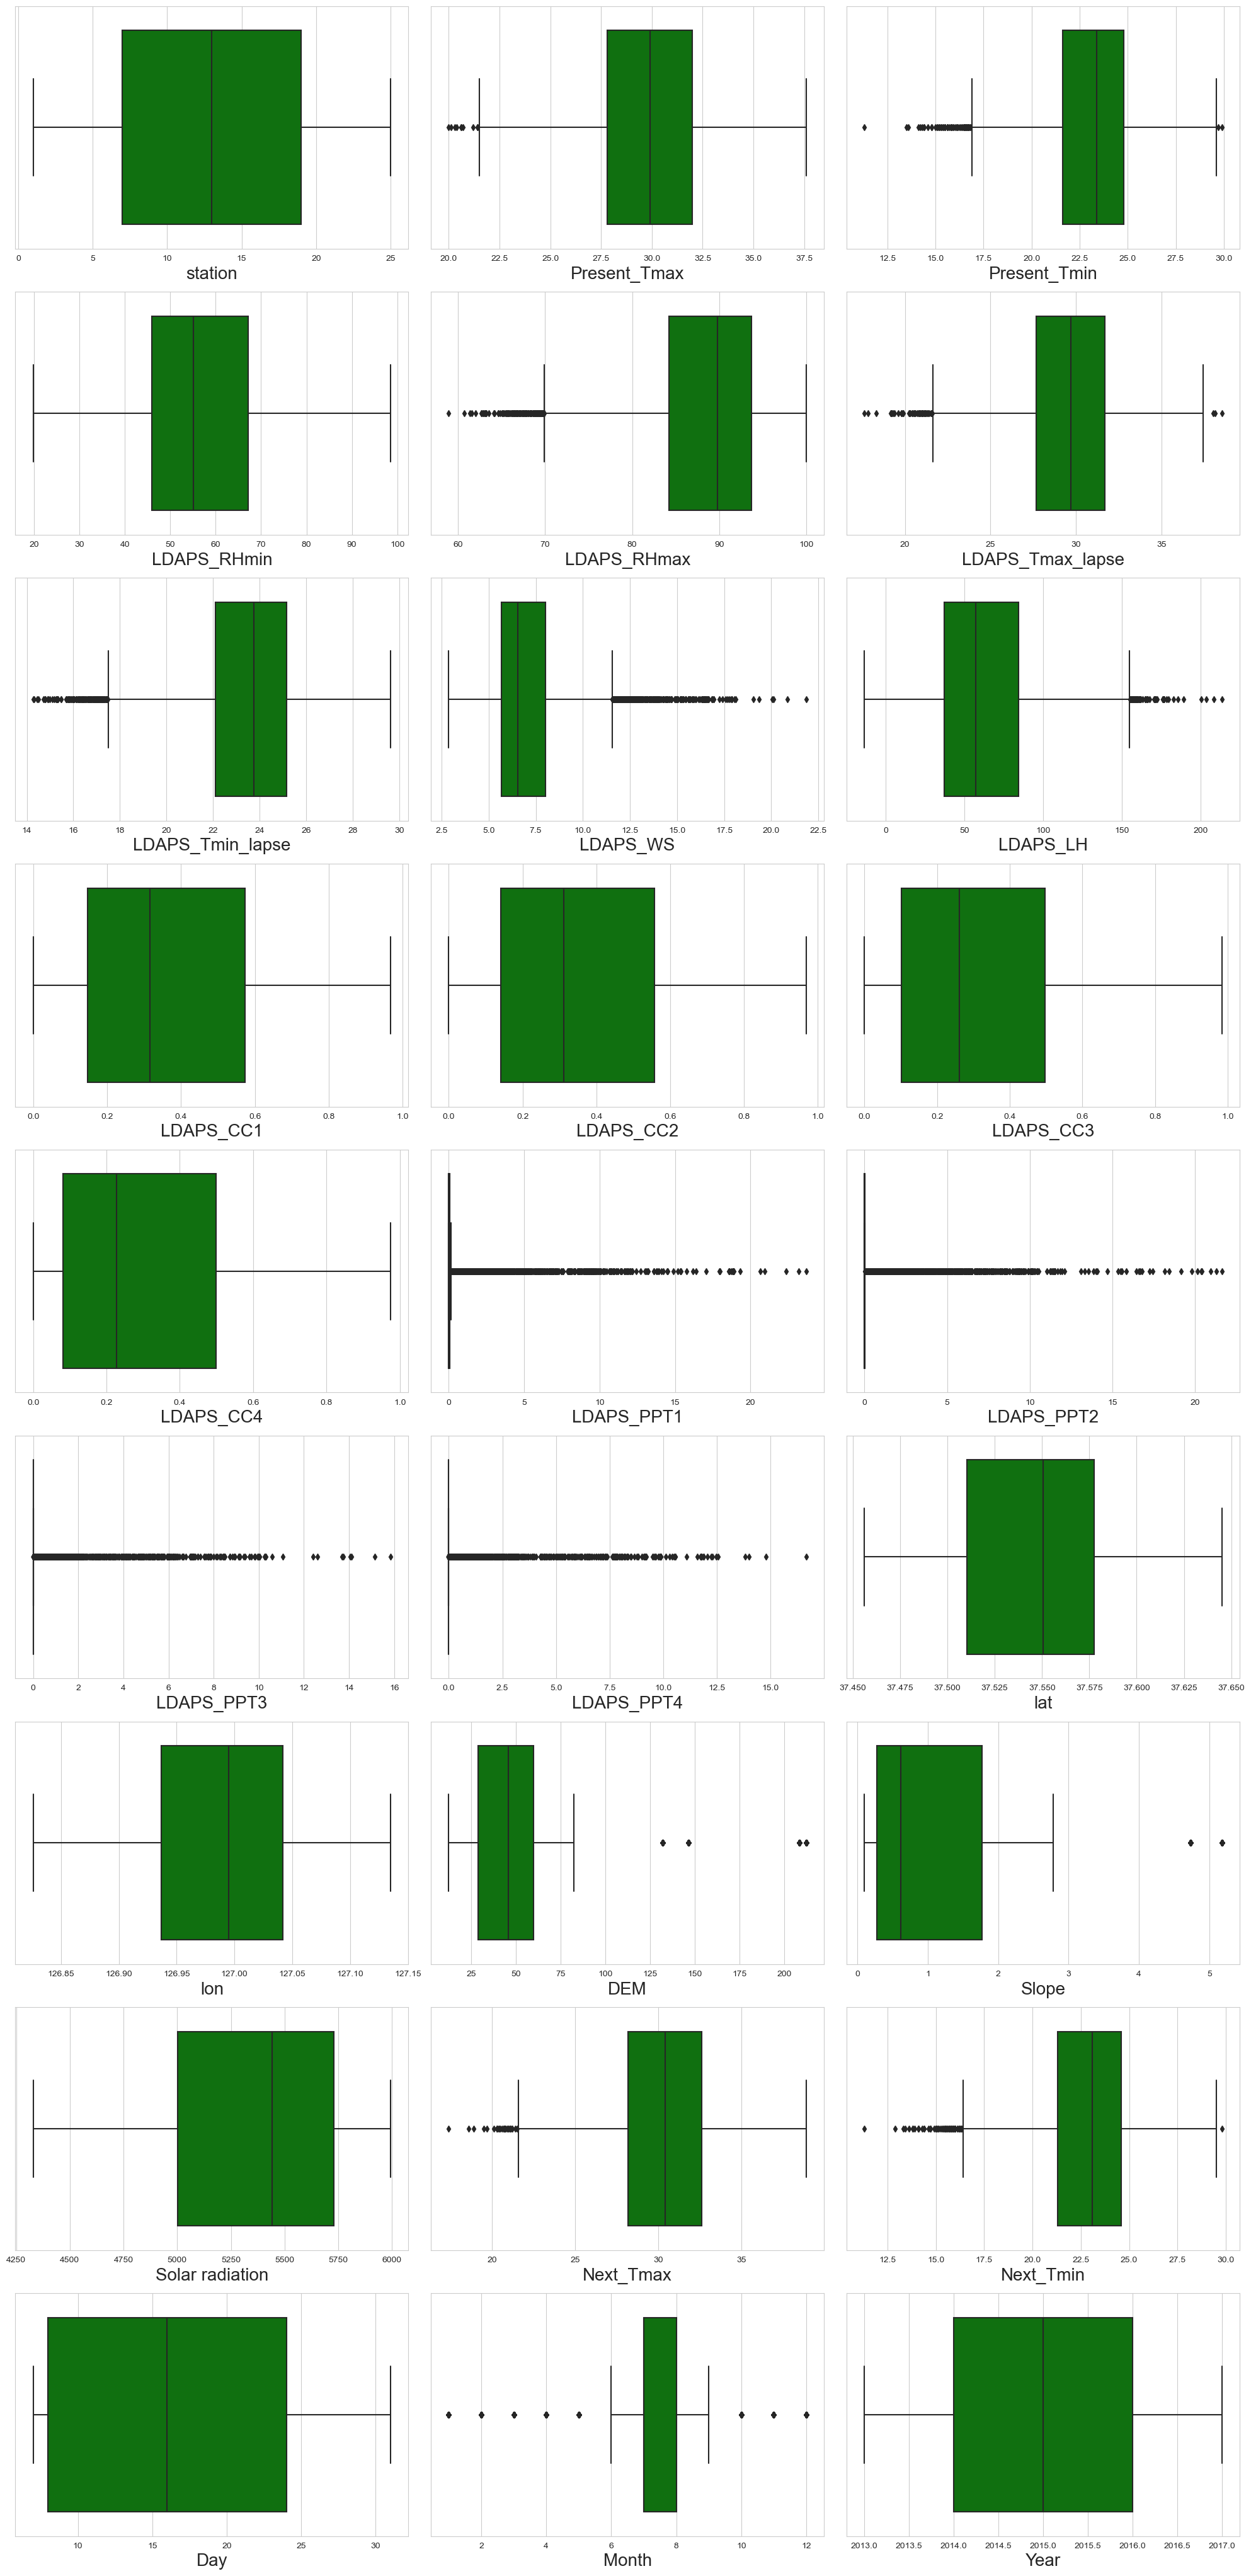

In [47]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [48]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (7588, 27)
Shape of the dataframe after removing outliers:  (6739, 27)
Percentage of data loss post outlier removal:  11.188719030047443


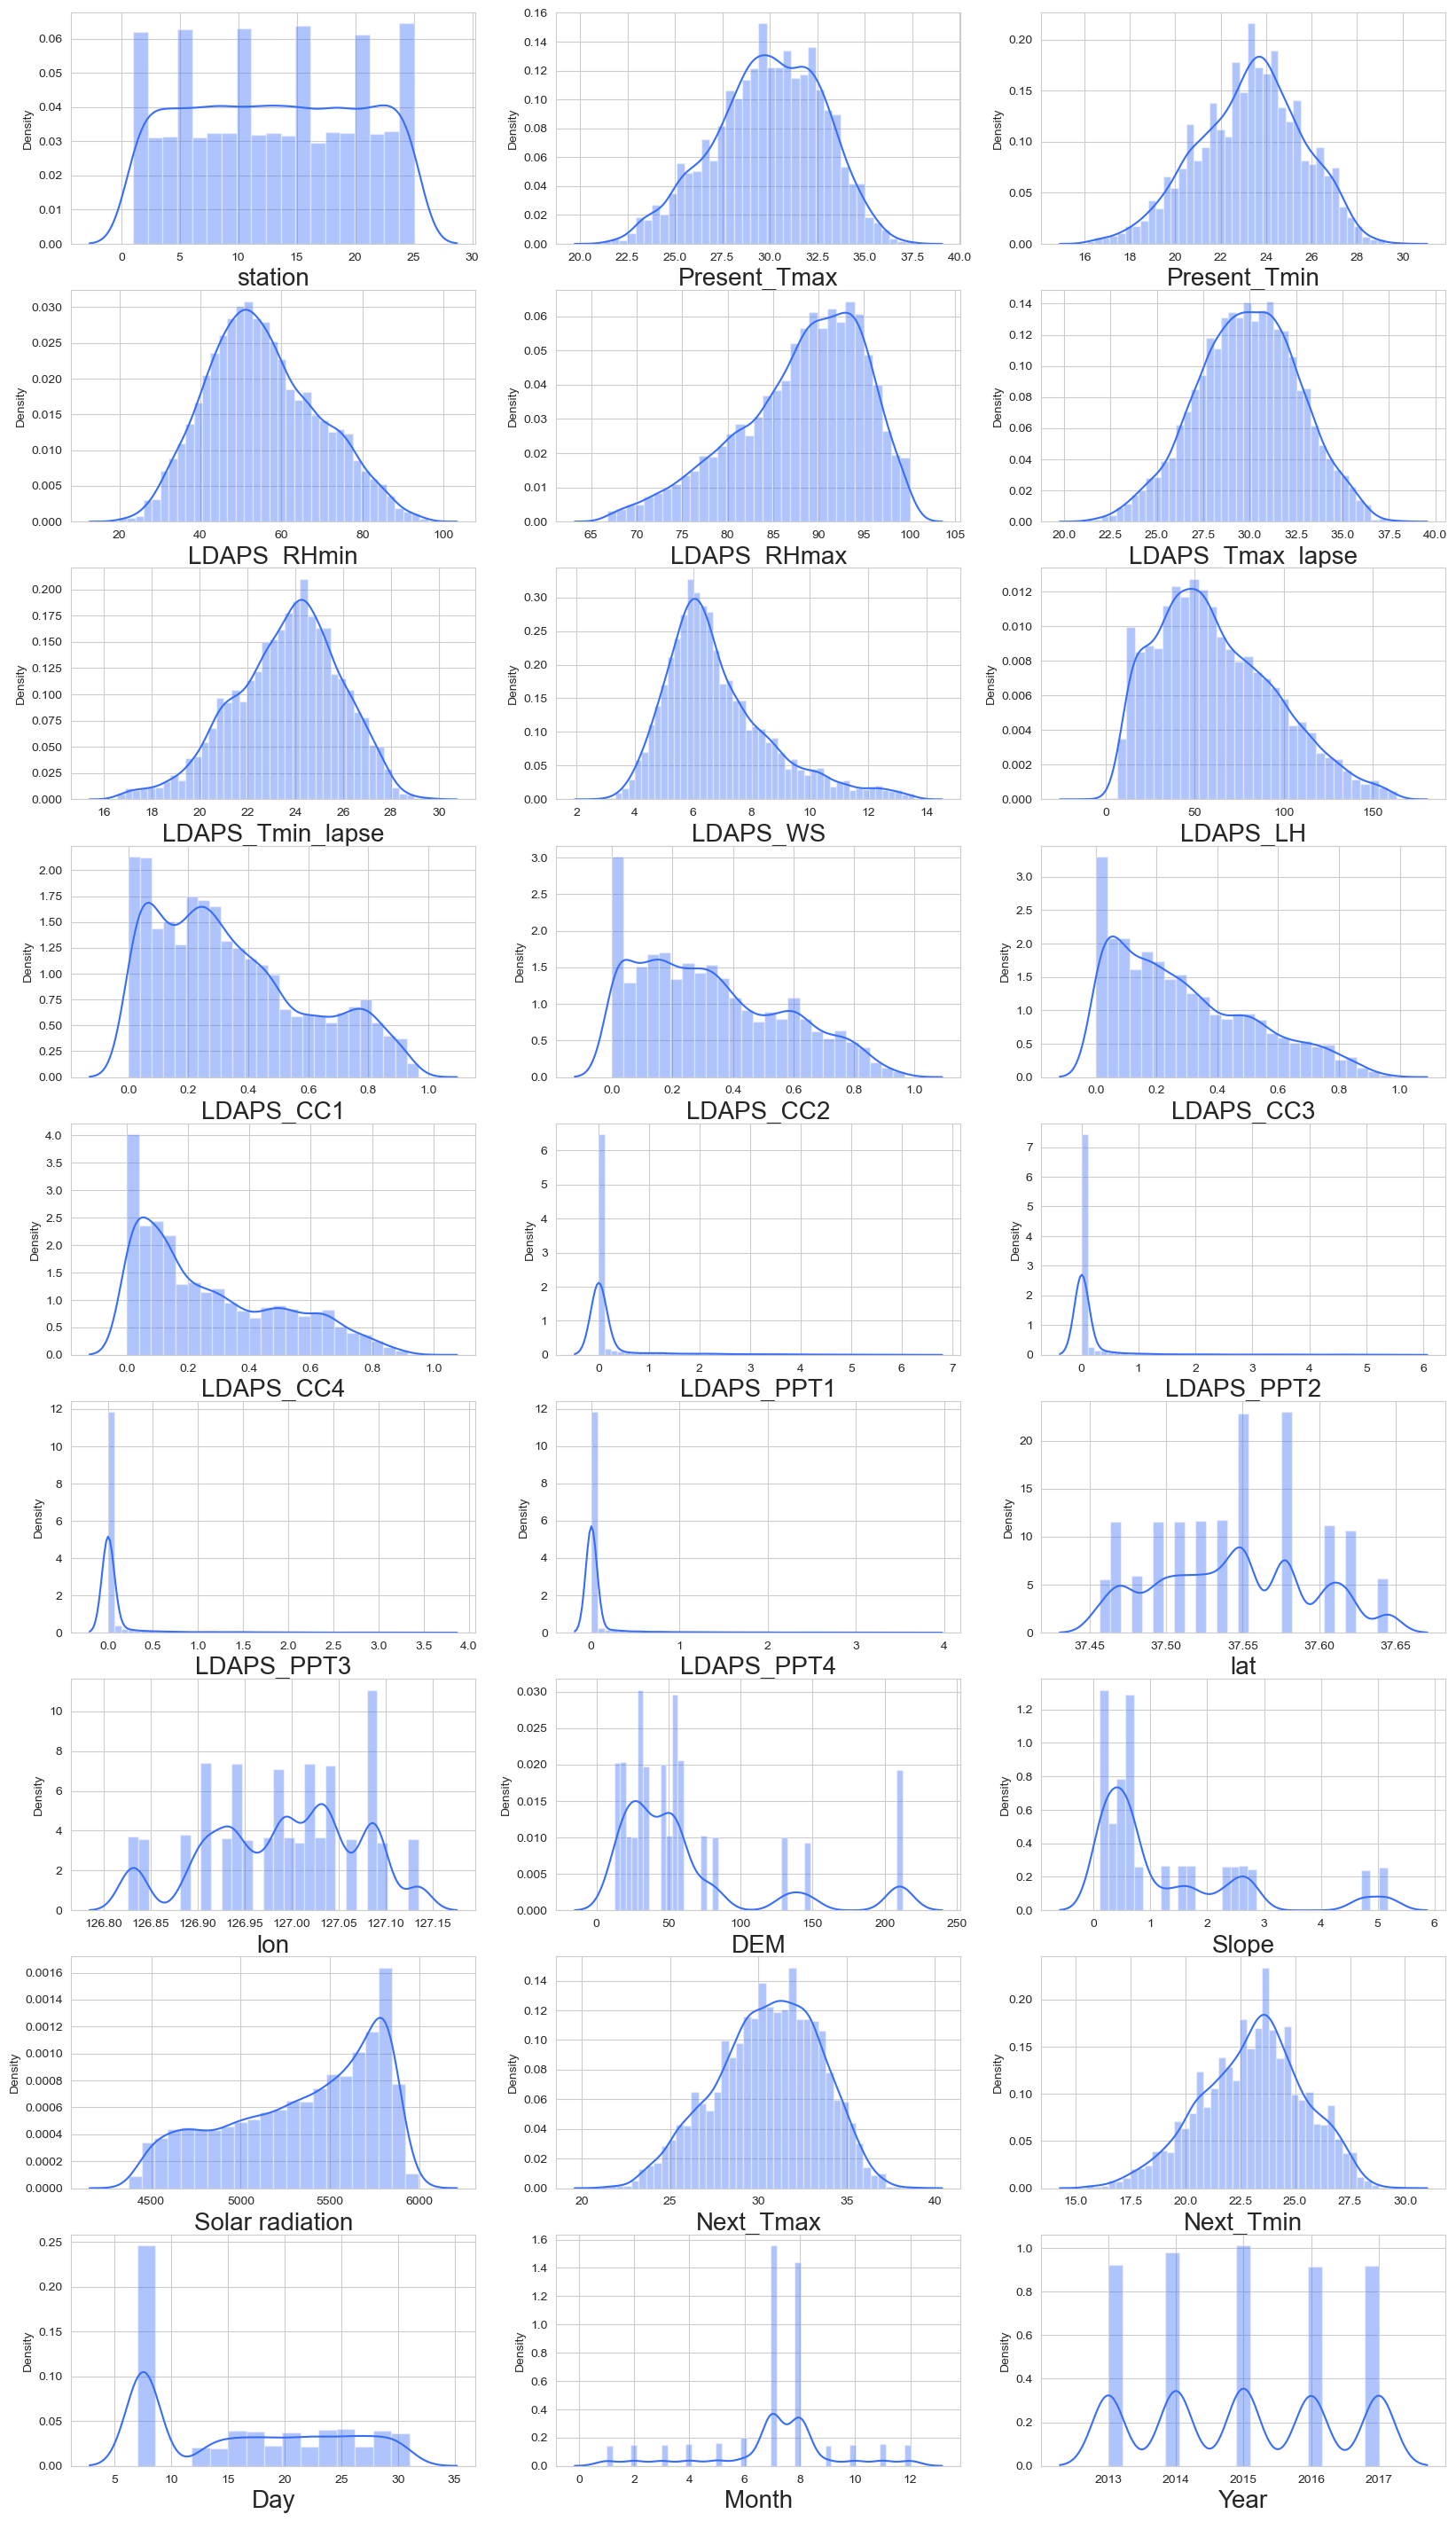

In [49]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [50]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month              -0.680725
Year                0.025066
dtype: float64

In [52]:
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)

In [53]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110291      0.133638    -0.069582   
Present_Tmax      0.110291      1.000000      0.610428    -0.154266   
Present_Tmin      0.133638      0.610428      1.000000     0.151385   
LDAPS_RHmin      -0.069582     -0.154266      0.151385     1.000000   
LDAPS_RHmax      -0.183451     -0.322779     -0.055235     0.566764   
LDAPS_Tmax_lapse  0.066863      0.540680      0.441577    -0.555583   
LDAPS_Tmin_lapse  0.109033      0.623808      0.763639     0.112428   
LDAPS_WS          0.030524     -0.069713      0.035152     0.168404   
LDAPS_LH         -0.135723      0.119218     -0.008495    -0.002906   
LDAPS_CC1         0.008671     -0.290078      0.090828     0.574389   
LDAPS_CC2         0.006380     -0.157917      0.117894     0.713238   
LDAPS_CC3         0.006098     -0.061485      0.044153     0.632481   
LDAPS_CC4         0.011574     -0.050202      0.001344     0.458457   
LDAPS_PPT1       -0.002447     -0.202304      0.072693     0.425870   
LDAPS_PPT2       -0.008259     -0.105340      0.104421     0.522672   
LDAPS_PPT3       -0.015657     -0.042731      0.029559     0.439268   
LDAPS_PPT4       -0.000449     -0.031619     -0.063746     0.267687   
lat              -0.241811     -0.052041     -0.072707     0.090054   
lon              -0.122829      0.011132     -0.043201    -0.093969   
DEM              -0.327126     -0.130146     -0.238472     0.056561   
Slope            -0.149577     -0.090758     -0.161118     0.074057   
Solar radiation  -0.035845     -0.113658     -0.072920     0.218884   
Next_Tmax         0.106378      0.586943      0.438813    -0.433872   
Next_Tmin         0.129110      0.615950      0.785946     0.134518   
Day               0.005179     -0.136914     -0.076877    -0.070194   
Month             0.003477      0.040044     -0.019235    -0.070328   
Year              0.006658      0.099185      0.099222     0.001709   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.183451          0.066863          0.109033  0.030524   
Present_Tmax        -0.322779          0.540680          0.623808 -0.069713   
Present_Tmin        -0.055235          0.441577          0.763639  0.035152   
LDAPS_RHmin          0.566764         -0.555583          0.112428  0.168404   
LDAPS_RHmax          1.000000         -0.404961         -0.186415  0.061239   
LDAPS_Tmax_lapse    -0.404961          1.000000          0.624720 -0.150617   
LDAPS_Tmin_lapse    -0.186415          0.624720          1.000000  0.000407   
LDAPS_WS             0.061239         -0.150617          0.000407  1.000000   
LDAPS_LH             0.282556          0.006333         -0.143326 -0.056712   
LDAPS_CC1            0.427048         -0.416255          0.021658  0.200101   
LDAPS_CC2            0.372434         -0.492392          0.086212  0.152994   
LDAPS_CC3            0.139771         -0.462439          0.033526  0.058573   
LDAPS_CC4            0.046726         -0.362521         -0.015241  0.085162   
LDAPS_PPT1           0.418040         -0.315822         -0.039343  0.201696   
LDAPS_PPT2           0.397902         -0.363531          0.021753  0.173840   
LDAPS_PPT3           0.244110         -0.314765         -0.018281  0.096427   
LDAPS_PPT4           0.104459         -0.226345         -0.084978  0.151107   
lat                  0.238703         -0.038285         -0.091834 -0.028068   
lon                  0.012312          0.106354         -0.025146 -0.077715   
DEM                  0.175987         -0.109077         -0.174616  0.112368   
Slope                0.202087         -0.094371         -0.154325  0.091920   
Solar radiation      0.150918         -0.052156         -0.020302  0.169197   
Next_Tmax           -0.325671          0.816861          0.551094 -0.202194   
Next_Tmin           -0.111690          0.553227          0.873087  0.025031   
Day                 -0.008612         -0.140514        

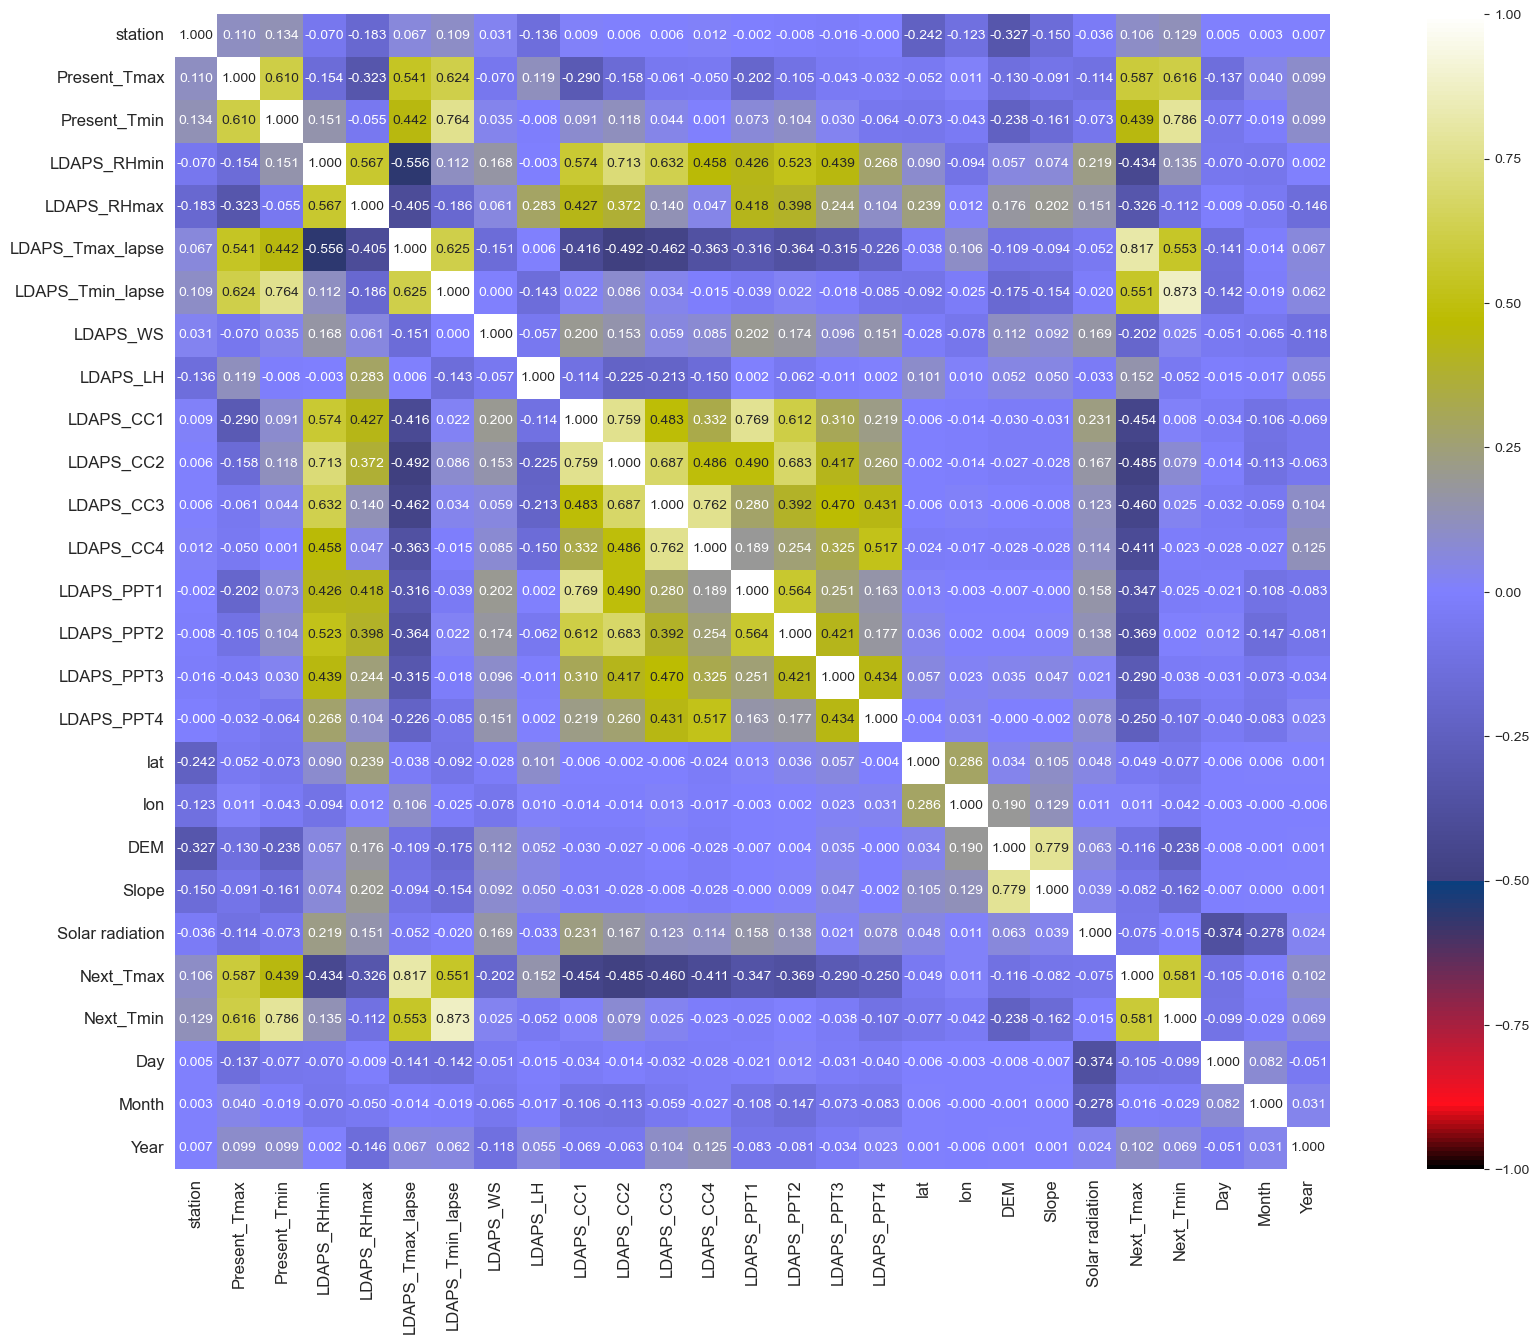

In [54]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

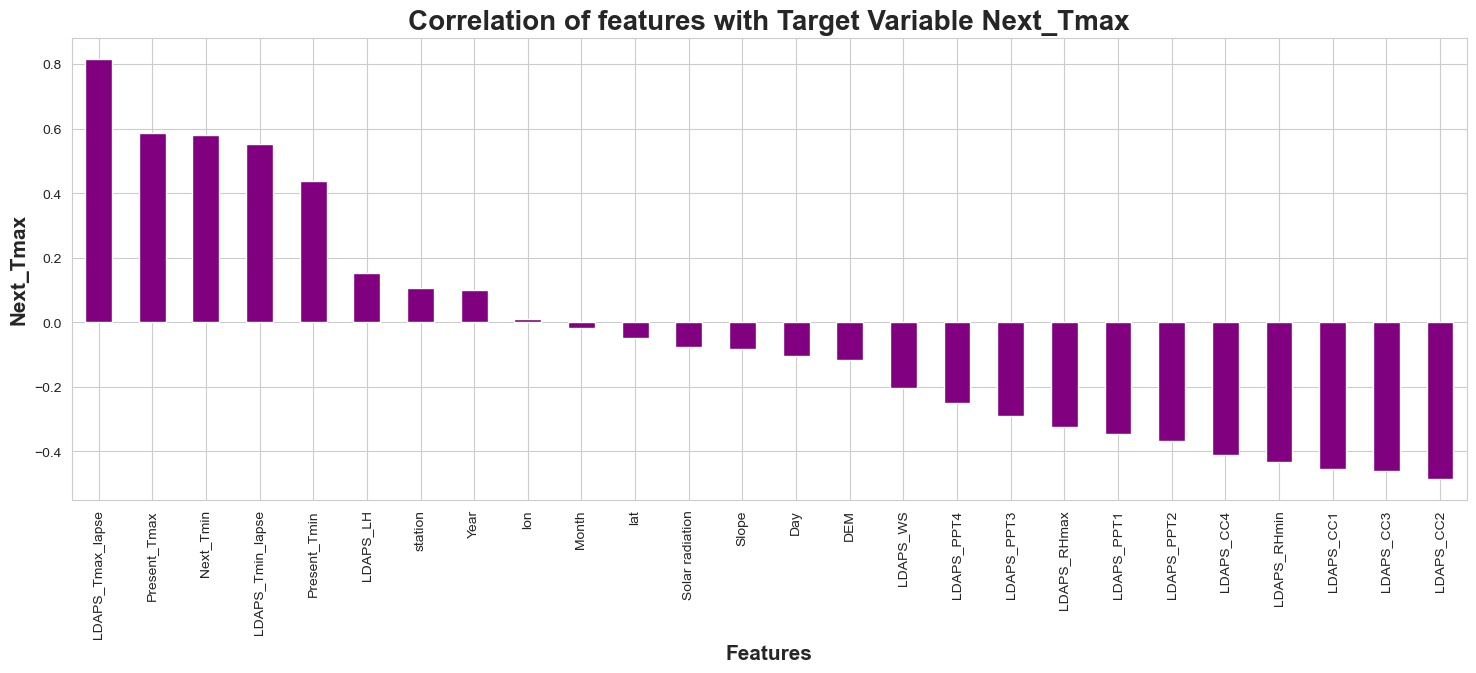

In [55]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()

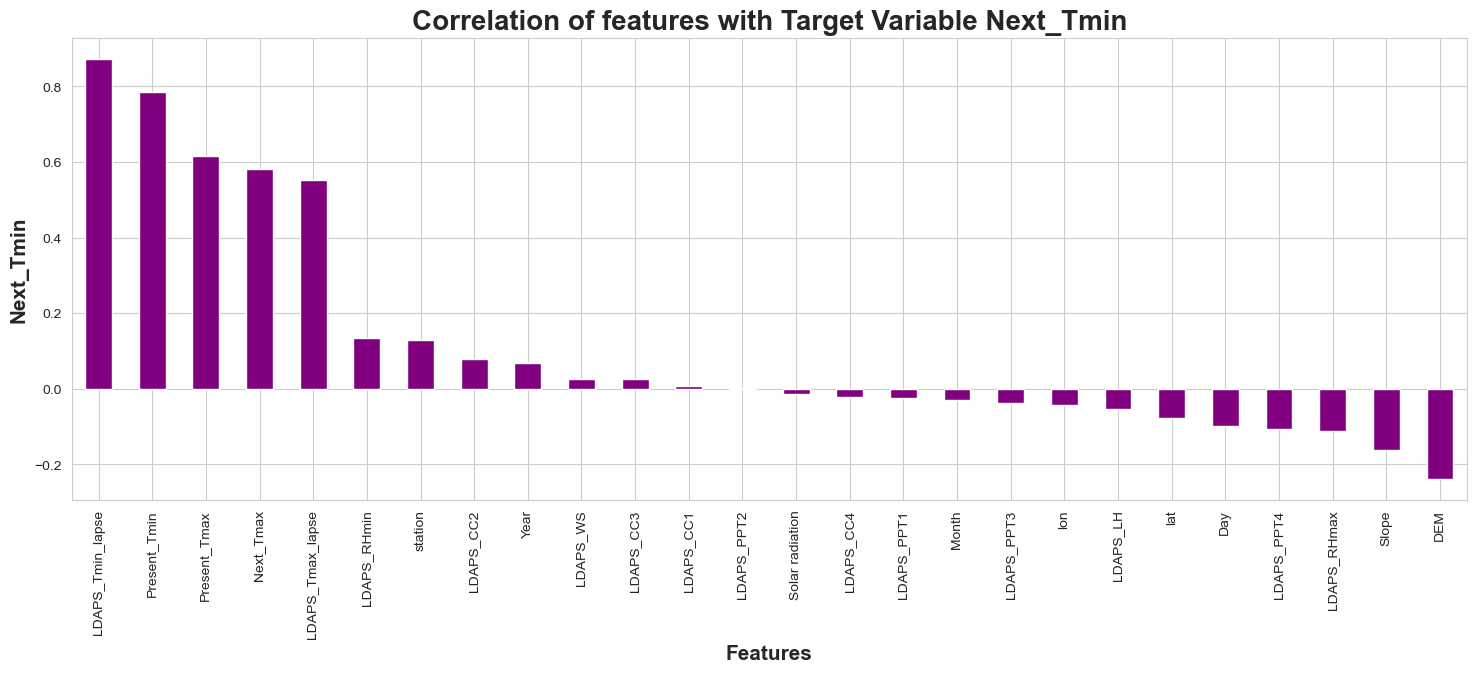

In [56]:
X = df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [57]:
X = df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [58]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values          Features
0     1.285456           station
1     2.826906      Present_Tmax
2     3.369980      Present_Tmin
3     5.998291       LDAPS_RHmin
4     2.623734       LDAPS_RHmax
5     6.499940  LDAPS_Tmax_lapse
6     8.134993  LDAPS_Tmin_lapse
7     1.210921          LDAPS_WS
8     1.514681          LDAPS_LH
9     5.478614         LDAPS_CC1
10    5.575046         LDAPS_CC2
11    4.391593         LDAPS_CC3
12    2.809147         LDAPS_CC4
13    3.034126        LDAPS_PPT1
14    2.446393        LDAPS_PPT2
15    1.650863        LDAPS_PPT3
16    1.661542        LDAPS_PPT4
17    1.300643               lat
18    1.225210               lon
19    3.310039               DEM
20    2.817563             Slope
21    1.478460   Solar radiation
22    5.601321         Next_Tmin
23    1.253647               Day
24    1.133742             Month
25    1.126275              Year

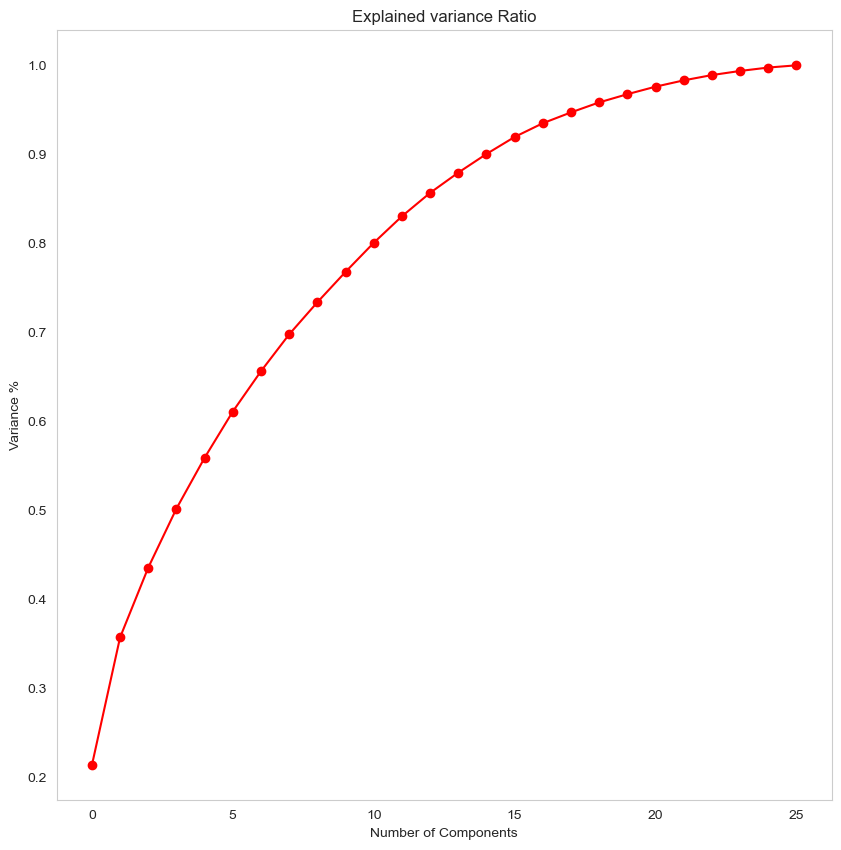

In [60]:
from sklearn.decomposition import PCA
pca = PCA()

x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [61]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)

In [62]:
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 15)
Training target vector size: (4515,)
Test feature matrix size: (2224, 15)
Test target vector size: (2224,)


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.7998223856334241 on Random_state 108


In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=108, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [31.82946217 30.18521306 29.17277087 ... 25.7300846  25.07900988
 32.6696635 ]


Actual Wins:
 934     32.0
4582    30.1
7277    27.8
4776    27.6
3755    29.8
        ... 
7096    36.7
7148    35.4
7667    28.4
5063    24.0
4239    32.6
Name: Next_Tmax, Length: 2224, dtype: float64


In [67]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 1.0211035976044966
Mean squared error : 1.7634575982728846
Root Mean Squared Error: 1.327952408135504


 R2 Score :
0.7998223856334241


In [68]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.6598422006139817


In [69]:
from sklearn.ensemble import BaggingRegressor

In [70]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.7004698741007194
Mean squared error : 0.8684817243705033
Root Mean Squared Error: 0.9319236687468042


 R2 Score :
0.901414924931722


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.6003012589928057
Mean squared error : 0.6378265224820144
Root Mean Squared Error: 0.7986404212673025


 R2 Score :
0.9275975834206469


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0547661870503597
Mean squared error : 2.1071942446043166
Root Mean Squared Error: 1.4516178025239002


 R2 Score :
0.7608033687314107


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.1589343592941752
Mean squared error : 2.02552564141309
Root Mean Squared Error: 1.4232096266583818


 R2 Score :
0.7700739211798969


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.8339594535533489
Mean squared error : 1.1612289748228026
Root Mean Squared Error: 1.0776033476297309


 R2 Score :
0.8681839324398642


 Error of  XGBRegr

In [71]:
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')




Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.6828455881488601


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.6977342739989643


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.42789061531892203


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.6586366935666581


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.7035387465746262


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, ma

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
parameter = {'n_estimators':[200,400,500,600],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [74]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)

In [75]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 1/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-67.166 total time=   2.2s
[CV 2/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 2/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-68.411 total time=   2.1s
[CV 3/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 3/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-78.622 total time=   1.8s
[CV 4/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 4/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-75.156 total time=   2.4s
[CV 5/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimator

KeyboardInterrupt: 

In [77]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 10, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')




 Error in Final Model :
Mean absolute error : 0.6148217844448501
Mean squared error : 0.6473203610632596
Root Mean Squared Error: 0.8045622170244261


 R2 Score of Final Model :
0.9265198971977197




 True Values Vs Predicted Value plot :


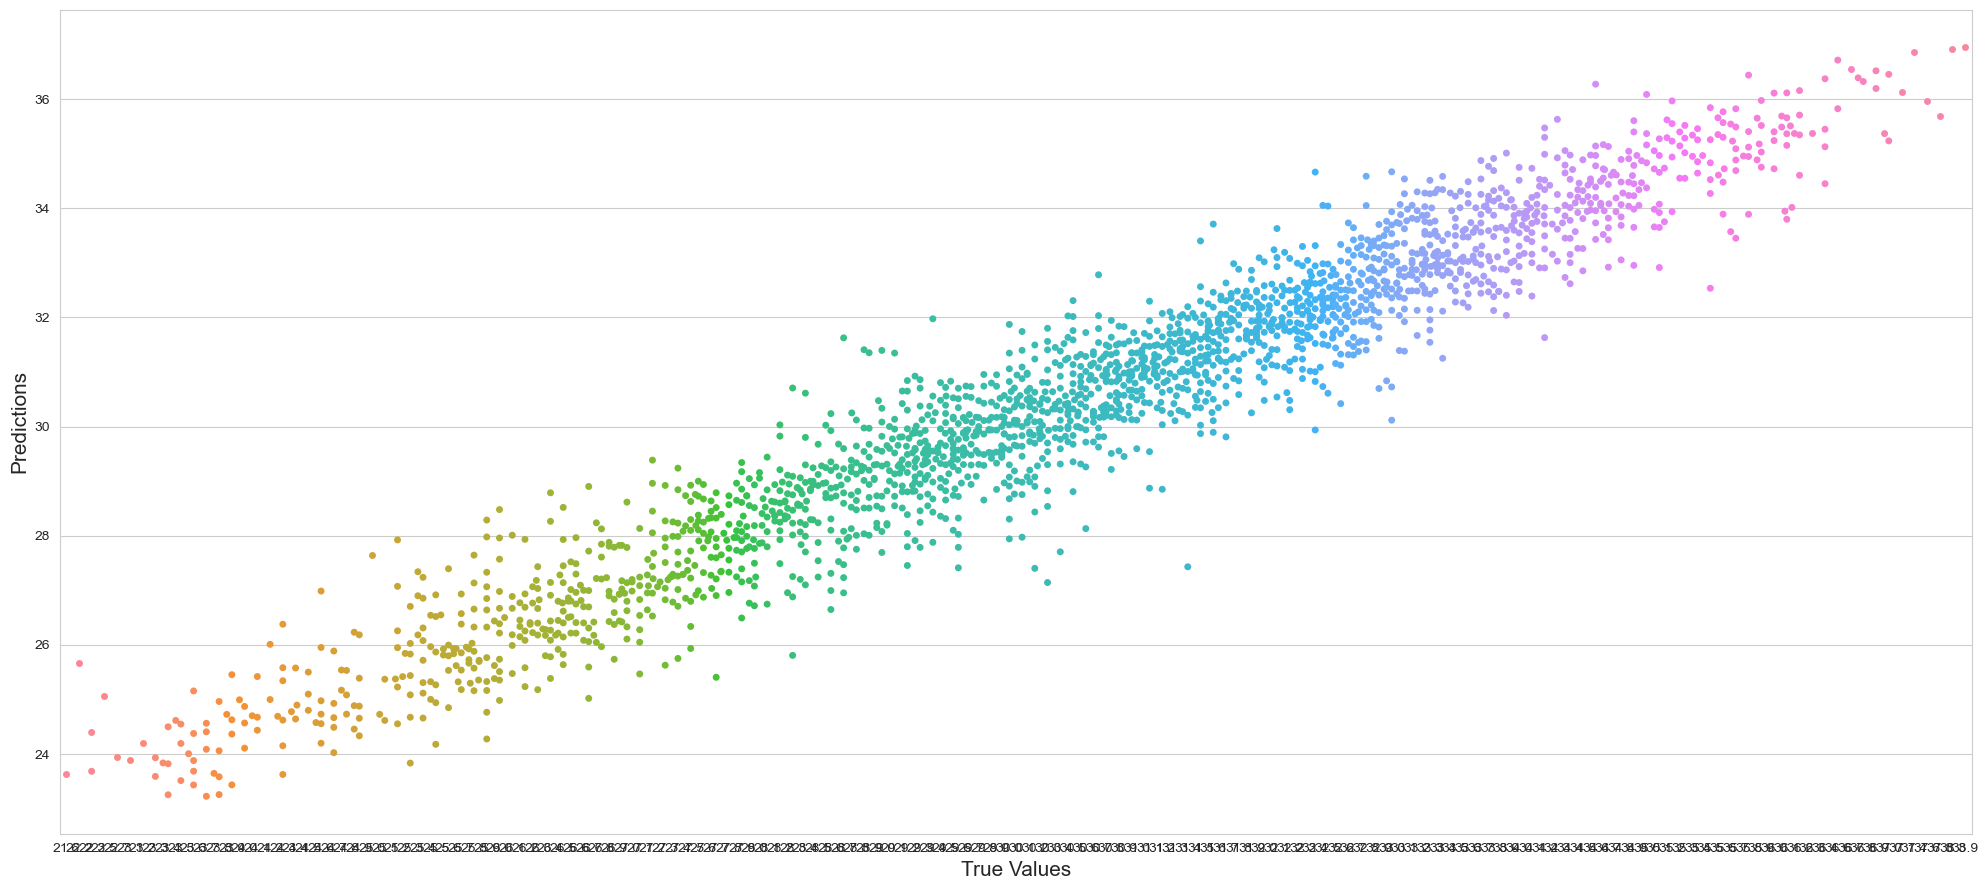

In [78]:
plt.figure(figsize=(20,9))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

In [79]:
import joblib
joblib.dump(Final_mod,'Next_Tmax_Forecast_Final.pkl')

['Next_Tmax_Forecast_Final.pkl']

In [80]:
Model = joblib.load("Next_Tmax_Forecast_Final.pkl")

actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

Actual Values  Predicted Values
0              32.0         31.540430
1              30.1         30.000784
2              27.8         28.569111
3              27.6         27.325127
4              29.8         30.164295
...             ...               ...
2219           36.7         36.545464
2220           35.4         34.851269
2221           28.4         27.200428
2222           24.0         24.109123
2223           32.6         32.219158

[2224 rows x 2 columns]

In [81]:
X = df.drop(['Next_Tmin'], axis =1)
Y = df['Next_Tmin']

In [82]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 26)
Training target vector size: (4515,)
Test feature matrix size: (2224, 26)
Test target vector size: (2224,)


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8504068494426478 on Random_state 43


In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=43, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [23.30294383 24.83852199 23.3759672  ... 22.5676851  26.3478694
 25.32944635]


Actual Wins:
 5006    23.0
947     25.6
3726    23.0
715     22.1
4242    24.0
        ... 
4097    24.6
3186    17.1
6641    23.1
3854    26.2
1190    25.7
Name: Next_Tmin, Length: 2224, dtype: float64


In [86]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.7377706440728512
Mean squared error : 0.8624219067066692
Root Mean Squared Error: 0.9286667360827937


 R2 Score :
0.8504068494426478


In [87]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7876269083757573


In [88]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')




 Error of  RandomForestRegressor() :
Mean absolute error : 0.5487801258992804
Mean squared error : 0.5221308385791363
Root Mean Squared Error: 0.7225862153259889


 R2 Score :
0.9094327306173456


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.5164046762589929
Mean squared error : 0.4624663381294965
Root Mean Squared Error: 0.680048776287037


 R2 Score :
0.9197819582161385


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.8110161870503598
Mean squared error : 1.207162769784173
Root Mean Squared Error: 1.0987095930154487


 R2 Score :
0.7906091200104743


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.8351711167635284
Mean squared error : 1.0610507900048838
Root Mean Squared Error: 1.0300731964306633


 R2 Score :
0.8159532714279896


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.6032015094840772
Mean squared error : 0.5906814691518792
Root Mean Squared Error: 0.7685580454018286


 R2 Score :
0.8975421411966416


 Error of  XGBReg

In [89]:
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')




Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.7896035910055932


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.7950800698874012


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.5976899825194503


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.7446164430716113


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.8045580764458379


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
parameter = {'n_estimators':[50,75,100],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [92]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=-87.675 total time=   0.4s
[CV 2/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=-82.833 total time=   0.4s
[CV 3/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 3/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=-81.296 total time=   0.4s
[CV 4/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 4/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=-89.509 total time=   0.3s
[CV 5/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
   

In [93]:
GCV.best_params_

{'booster': 'dart',
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 8,
 'n_estimators': 100}

In [94]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 8, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.4471003979230099
Mean squared error : 0.34990975617849107
Root Mean Squared Error: 0.5915317034432652


 R2 Score of Final Model :
0.9393056896741158




 True Values Vs Predicted Value plot :


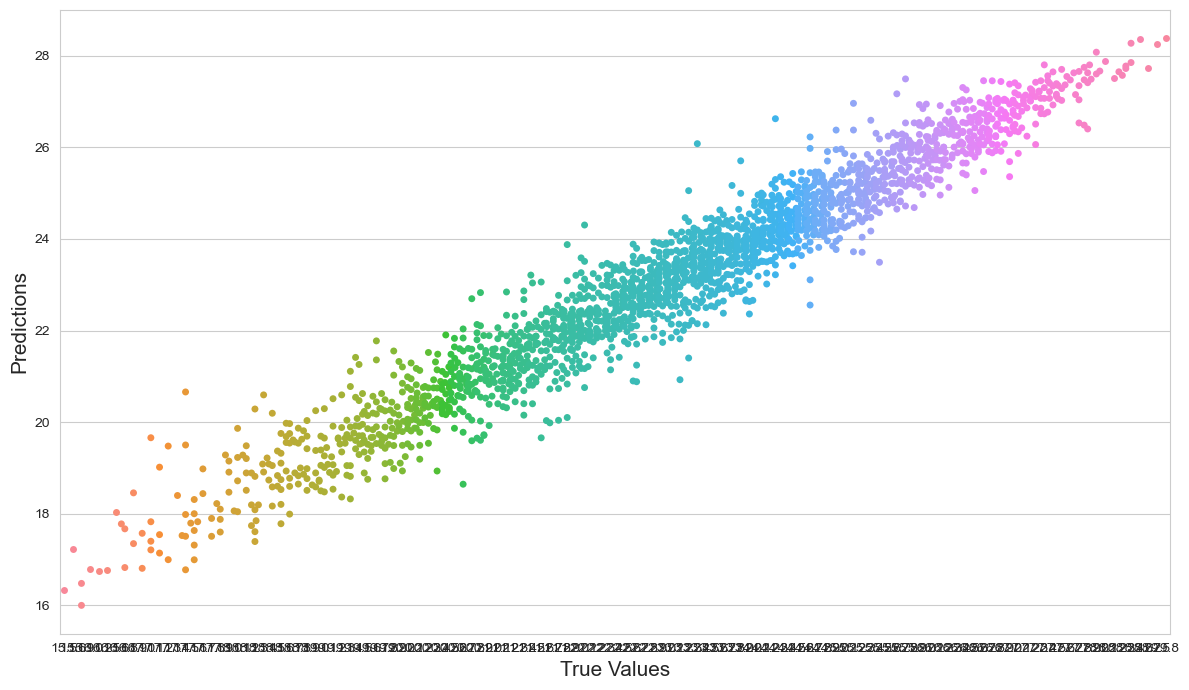

In [95]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

In [96]:
import joblib
joblib.dump(Final_mod,'Next_Tmin_Forecast_Final.pkl')

['Next_Tmin_Forecast_Final.pkl']

In [97]:
Model = joblib.load("Next_Tmin_Forecast_Final.pkl")

actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

Actual Values  Predicted Values
0              23.0         23.718370
1              25.6         25.195759
2              23.0         23.038933
3              22.1         23.123213
4              24.0         23.856539
...             ...               ...
2219           24.6         24.298847
2220           17.1         17.399721
2221           23.1         22.529100
2222           26.2         26.004419
2223           25.7         24.950108

[2224 rows x 2 columns]